In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/scr/qlyu/projects/v1/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

# get data

In [3]:
# get updated cell types
f = "/scr/qlyu/projects/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_1582117/1134612995.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


Class_broad  Doublet  Doublet Score batch  \
AAACGCTCACTTCATT-1-P8_1a-P8   Excitatory    False       0.025713     1   
AAAGGATAGGTGCATG-1-P8_1a-P8   Excitatory    False       0.011883     1   
AAAGGGCCAGTATACC-1-P8_1a-P8   Excitatory    False       0.024667     1   
AAAGTCCCATATACCG-1-P8_1a-P8   Excitatory    False       0.027921     1   
AAAGTCCTCAGATGCT-1-P8_1a-P8   Excitatory    False       0.009527     1   
...                                  ...      ...            ...   ...   
TTTGGTTCAGTTGTTG-1-P38_dr_1a         NaN    False       0.042872    11   
TTTGGTTTCTGCCTGT-1-P38_dr_2b         NaN    False       0.007108     2   
TTTGTTGCACCGGTCA-1-P38_dr_2a         NaN    False       0.030928     2   
TTTGTTGGTGGCTAGA-1-P38_dr_2b         NaN    False       0.015884     3   
TTTGTTGTCTATTGTC-1-P38_dr_1a         NaN    False       0.028005     3   

                              leiden  n_counts  n_genes  percent_mito  \
AAACGCTCACTTCATT-1-P8_1a-P8        0   23384.0     4943      0.000128   
AAAGGATAGGTGCATG-1-P8_1a-P8        0   17774.0     4698      0.000169   
AAAGGGCCAGTATACC-1-P8_1a-P8        0   15872.0     4173      0.000126   
AAAGTCCCATATACCG-1-P8_1a-P8        0   20076.0     4761      0.000050   
AAAGTCCTCAGATGCT-1-P8_1a-P8        4   19061.0     4601      0.000000   
...                              ...       ...      ...           ...   
TTTGGTTCAGTTGTTG-1-P38_dr_1a       1   11379.0     3568      0.000879   
TTTGGTTTCTGCCTGT-1-P38_dr_2b       1   16050.0     3104      0.000062   
TTTGTTGCACCGGTCA-1-P38_dr_2a       1   13955.0     3739      0.001146   
TTTGTTGGTGGCTAGA-1-P38_dr_2b       4    7272.0     2789      0.000963   
TTTGTTGTCTATTGTC-1-P38_dr_1a       4   11447.0     2959      0.000262   

                                 sample     Type Subclass   cond easitype  \
AAACGCTCACTTCATT-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGGATAGGTGCATG-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGGGCCAGTATACC-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGTCCCATATACCG-1-P8_1a-P8       P8_1a  L2/3_AB     L2/3   P8NR   L2/3_A   
AAAGTCCTCAGATGCT-1-P8_1a-P8       P8_1a  L2/3_BC     L2/3   P8NR   L2/3_C   
...                                 ...      ...      ...    ...      ...   
TTTGGTTCAGTTGTTG-1-P38_dr_1a  P38_dr_1a   L2/3_3     L2/3  P38DR   L2/3_C   
TTTGGTTTCTGCCTGT-1-P38_dr_2b  P38_dr_2b   L2/3_3     L2/3  P38DR   L2/3_C   
TTTGTTGCACCGGTCA-1-P38_dr_2a  P38_dr_2a   L2/3_3     L2/3  P38DR   L2/3_C   
TTTGTTGGTGGCTAGA-1-P38_dr_2b  P38_dr_2b   L2/3_2     L2/3  P38DR   L2/3_B   
TTTGTTGTCTATTGTC-1-P38_dr_1a  P38_dr_1a   L2/3_2     L2/3  P38DR   L2/3_B   

                              umap1  umap2 easisample easicond newtype  
AAACGCTCACTTCATT-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGGATAGGTGCATG-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGGGCCAGTATACC-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGTCCCATATACCG-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_A  
AAAGTCCTCAGATGCT-1-P8_1a-P8     NaN    NaN         1a  1-P08NR  L2/3_C  
...                             ...    ...        ...      ...     ...  
TTTGGTTCAGTTGTTG-1-P38_dr_1a    NaN    NaN         1a  2-P38DR  L2/3_B  
TTTGGTTTCTGCCTGT-1-P38_dr_2b    NaN    NaN         2b  2-P38DR  L2/3_B  
TTTGTTGCACCGGTCA-1-P38_dr_2a    NaN    NaN         2a  2-P38DR  L2/3_B  
TTTGTTGGTGGCTAGA-1-P38_dr_2b    NaN    NaN         2b  2-P38DR  L2/3_A  
TTTGTTGTCTATTGTC-1-P38_dr_1a    NaN    NaN         1a  2-P38DR  L2/3_B  

[41048 rows x 18 columns]

In [4]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P28DR.h5ad',
] 

In [5]:
pbulks = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 2,4,42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[~adata.obs['Type'].str.contains('L4')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = tmp['Type']
    tmp.update(meta[['newtype']])
    types = tmp['newtype'].values
    
    # 1 or 2
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    sample_and_type = sample_codes + "_" + types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks = np.array(pbulks)
xcnsts = np.array(xcnsts)
print(pbulks.shape)
pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks.shape)

P28NR.h5ad
['1a_Astro_A' '1a_Astro_B' '1a_Endo' '1a_Frem1' '1a_L2/3_A' '1a_L2/3_B'
 '1a_L2/3_C' '1a_L5IT' '1a_L5NP' '1a_L5PT_A' '1a_L5PT_B' '1a_L6CT_A'
 '1a_L6CT_B' '1a_L6CT_C' '1a_L6IT_A' '1a_L6IT_B' '1a_L6b' '1a_Lamp5'
 '1a_Micro' '1a_OD_A' '1a_OD_B' '1a_OD_C' '1a_OPC_A' '1a_OPC_B'
 '1a_Pvalb_A' '1a_Pvalb_B' '1a_Pvalb_C' '1a_Pvalb_D' '1a_Sst_A' '1a_Sst_B'
 '1a_Sst_C' '1a_Sst_D' '1a_Sst_E' '1a_Stac' '1a_VLMC_A' '1a_VLMC_B'
 '1a_Vip_A' '1a_Vip_B' '1a_Vip_C' '1b_Astro_A' '1b_Astro_B' '1b_Endo'
 '1b_Frem1' '1b_L2/3_A' '1b_L2/3_B' '1b_L2/3_C' '1b_L5IT' '1b_L5NP'
 '1b_L5PT_A' '1b_L5PT_B' '1b_L6CT_A' '1b_L6CT_B' '1b_L6CT_C' '1b_L6IT_A'
 '1b_L6IT_B' '1b_L6b' '1b_Lamp5' '1b_Micro' '1b_OD_A' '1b_OD_B' '1b_OD_C'
 '1b_OPC_A' '1b_OPC_B' '1b_Pvalb_A' '1b_Pvalb_B' '1b_Pvalb_C' '1b_Pvalb_D'
 '1b_Sst_A' '1b_Sst_B' '1b_Sst_C' '1b_Sst_D' '1b_Sst_E' '1b_Stac'
 '1b_VLMC_A' '1b_VLMC_B' '1b_Vip_A' '1b_Vip_B' '1b_Vip_C' '2a_Astro_A'
 '2a_Astro_B' '2a_Endo' '2a_Frem1' '2a_L2/3_A' '2a_L2/3_B' '2a_L2/3_C'
 '2a

In [6]:
# check the pbulks are good -- log10(CPM+1) for each sample
checkpbulks = np.sum(np.power(10, pbulks)-1, axis=-1)
checkpbulks.shape, np.all(np.abs(checkpbulks-1e6) < 1e-6)

((2, 4, 39), True)

In [7]:
xclsts_short = np.array([clst[len("1a_"):] for clst in xclsts[0]]) #, '_'
xclsts_short

array(['Astro_A', 'Astro_B', 'Endo', 'Frem1', 'L2/3_A', 'L2/3_B',
       'L2/3_C', 'L5IT', 'L5NP', 'L5PT_A', 'L5PT_B', 'L6CT_A', 'L6CT_B',
       'L6CT_C', 'L6IT_A', 'L6IT_B', 'L6b', 'Lamp5', 'Micro', 'OD_A',
       'OD_B', 'OD_C', 'OPC_A', 'OPC_B', 'Pvalb_A', 'Pvalb_B', 'Pvalb_C',
       'Pvalb_D', 'Sst_A', 'Sst_B', 'Sst_C', 'Sst_D', 'Sst_E', 'Stac',
       'VLMC_A', 'VLMC_B', 'Vip_A', 'Vip_B', 'Vip_C'], dtype='<U7')

# filter out small bulk profiles

In [8]:
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

0    1    2    3    4    5    6    7
Astro_A  380  264  374  311  489  560  490  593
Astro_B   83   41   84   39  121   75  147   77
Endo      83  241   55  231  142  163  145  179
Frem1     20   15   19   14   29   21   31   20
L2/3_A   226  367  212  420  271  416  294  468
L2/3_B   559  351  560  375  458  602  510  552
L2/3_C   265  233  249  265  214  336  226  319
L5IT     221  184  165  186  237  275  226  292
L5NP      80   60   73   71  124  110  118  105
L5PT_A   140  175  158  189  142  200  174  208
L5PT_B    23   27   24   29   18   41   29   32
L6CT_A    51   22   55   19   56   60   50   61
L6CT_B   399  303  350  260  401  583  426  595
L6CT_C   267  263  247  271  287  295  326  276
L6IT_A   261  254  260  259  325  429  335  432
L6IT_B    75   66   75   83   47   79   58   82
L6b       44   47   51   45   59   52   82   44
Lamp5     47   45   51   57   65   98   60   98
Micro    203  257  224  281  344  338  377  356
OD_A      72   40   63   51   94   52  123   56
OD_B     191  177  206  153  294  249  312  253
OD_C      41   50   41   45   53   64   55   69
OPC_A    148  107  169  136  260  215  302  230
OPC_B      4    2   12    7   21    7   37   10
Pvalb_A   62   26   48   33   59  101   86   94
Pvalb_B   47   22   52   34   63   62   73   79
Pvalb_C   28   13   28   21   34   40   32   46
Pvalb_D   40   25   44   19   42   62   51   58
Sst_A     41   25   46   24   40   67   50   70
Sst_B     28   20   19   21   27   36   33   47
Sst_C     46   29   42   31   42   55   49   45
Sst_D     14   20   16   22   26   26   22   25
Sst_E     12   17   14   19   12   30   15   42
Stac       7   11    4    8   14   10   17   19
VLMC_A    15   21   24   14   29   38   34   46
VLMC_B    17   26   30   25   66   58   55   55
Vip_A     28   26   32   22   37   55   42   61
Vip_B     26   14   26   20   38   29   38   42
Vip_C     23   13   25   14   21   26   23   30

In [9]:
numcells.min(axis=1).sort_values()

OPC_B        2
Stac         4
Sst_E       12
Vip_C       13
Pvalb_C     13
Sst_D       14
Vip_B       14
Frem1       14
VLMC_A      14
VLMC_B      17
L5PT_B      18
L6CT_A      19
Sst_B       19
Pvalb_D     19
Vip_A       22
Pvalb_B     22
Sst_A       24
Pvalb_A     26
Sst_C       29
Astro_B     39
OD_A        40
OD_C        41
L6b         44
Lamp5       45
L6IT_B      47
Endo        55
L5NP        60
OPC_A      107
L5PT_A     140
OD_B       153
L5IT       165
Micro      203
L2/3_A     212
L2/3_C     214
L6CT_C     247
L6IT_A     254
L6CT_B     260
Astro_A    264
L2/3_B     351
dtype: int64

In [10]:
xclsts_sel = xclsts_short[numcells.min(axis=1)>50]
unq_types = xclsts_sel
xclsts_selidx = basicu.get_index_from_array(xclsts_short, xclsts_sel)
pbulks = pbulks[:,:,xclsts_selidx,:]
xclsts_sel, xclsts_selidx

(array(['Astro_A', 'Endo', 'L2/3_A', 'L2/3_B', 'L2/3_C', 'L5IT', 'L5NP',
        'L5PT_A', 'L6CT_B', 'L6CT_C', 'L6IT_A', 'Micro', 'OD_B', 'OPC_A'],
       dtype='<U7'),
 array([ 0,  2,  4,  5,  6,  7,  8,  9, 12, 13, 14, 18, 20, 22]))

# filter out unexpressed genes

In [11]:
tensor_nr = pbulks[0].T
tensor_dr = pbulks[1].T
tensor_nr.shape, tensor_dr.shape

((53801, 14, 4), (53801, 14, 4))

In [12]:
expressed_nr  = np.any(np.mean(tensor_nr, axis=2) > np.log10(1+1), axis=1) # mean exp of CPM=1 in any subclass
expressed_dr  = np.any(np.mean(tensor_dr, axis=2) > np.log10(1+1), axis=1) 
expressed_any = np.logical_or(expressed_nr, expressed_dr)
expressed_nr.sum(), expressed_dr.sum(), expressed_any.sum()

(19299, 18796, 19788)

In [13]:
genes_comm = genes[expressed_any]
genes_cidx = basicu.get_index_from_array(genes, genes_comm)
assert np.any(genes_cidx!=-1)

tensor_nr = pbulks[0].T[genes_cidx]
tensor_dr = pbulks[1].T[genes_cidx]

genes_comm, tensor_nr.shape

(array(['Xkr4', 'Gm1992', 'Rp1', ..., 'AC125149.3', 'AC149090.1',
        'CAAA01118383.1'], dtype=object),
 (19788, 14, 4))

In [14]:
idx = np.arange(len(genes))[~expressed_any]
tensor_nr_ctrl = pbulks[0].T[idx]
tensor_dr_ctrl = pbulks[1].T[idx]

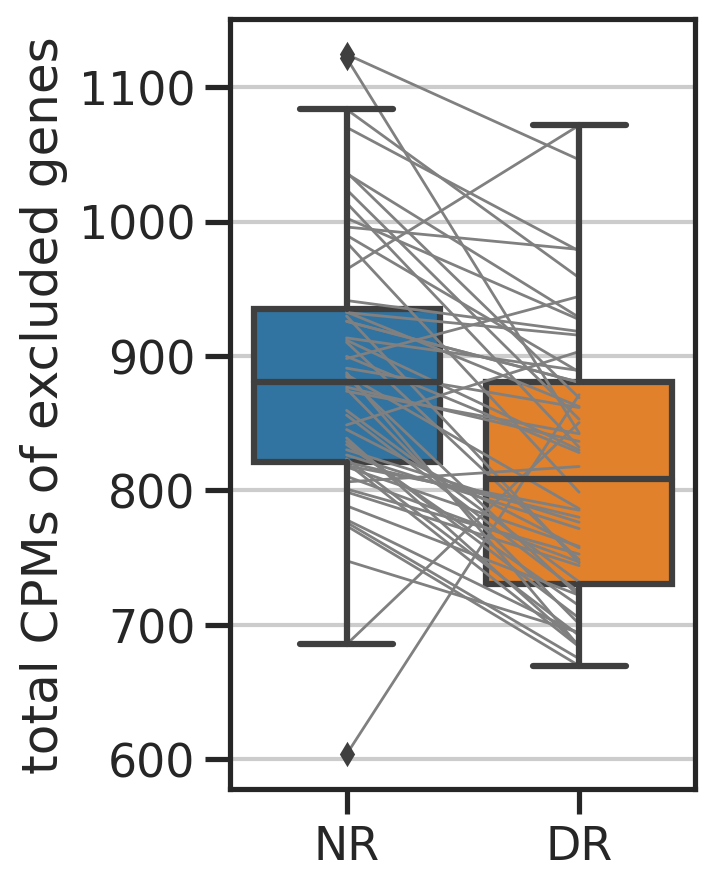

In [15]:
a = np.sum(np.power(10, tensor_nr_ctrl)-1, axis=0).ravel()
b = np.sum(np.power(10, tensor_dr_ctrl)-1, axis=0).ravel()

fig, ax = plt.subplots(figsize=(3,5))
for ai, bi in zip(a,b):
    ax.plot([0,1], [ai,bi], '-', color='gray', linewidth=1, markersize=1)
sns.boxplot([a,b], ax=ax)
ax.set_ylabel('total CPMs of excluded genes')
ax.set_xticklabels(['NR', 'DR'])
plt.show()

# Do the tests

In [16]:
# for each gene and cell type; 4 rep vs 4 rep - t-test and p-val correction 
lfc = np.mean(tensor_dr, axis=2) - np.mean(tensor_nr, axis=2) # log10FC (log10CPM as raw counts)
higherexp = np.maximum(np.mean(tensor_dr, axis=2), np.mean(tensor_nr, axis=2)) # mean exp for every gene type pair in the higher expressed condition
ts, ps = ttest_ind(tensor_nr, tensor_dr, axis=2)
rejs, qs, _, _ = multipletests(np.nan_to_num(ps, nan=1).reshape(-1,), method='fdr_bh')
rejs = rejs.reshape(ps.shape)
qs = qs.reshape(ps.shape)

In [17]:
# ps_nonnan = ps.reshape(-1,)
# print(ps_nonnan.shape)
# ps_nonnan = ps_nonnan[~np.isnan(ps_nonnan)]
# ps_nonnan.shape
np.isnan(ps).sum()

11768

In [18]:
lfc.shape, rejs.shape, qs.shape, np.sum(np.sum(rejs, axis=1) > 0), np.sum(rejs, axis=0) 

((19788, 14),
 (19788, 14),
 (19788, 14),
 3467,
 array([ 550,  113,  363, 1408, 1062,  374,   58,  323,  738,  300,  619,
          66,  113,   48]))

In [19]:
fc = 2
cond1 = rejs # FDR< 0.05
cond2 = np.abs(lfc) > np.log10(fc) 
cond2up = lfc >  np.log10(fc) 
cond2dn = lfc < -np.log10(fc) 
cond3 = higherexp > np.log10(100+1) # 

sigsigs = np.all([cond1, cond2, cond3], axis=0)
sigsigs.shape, np.sum(np.sum(sigsigs, axis=1) > 0), np.sum(sigsigs, axis=0)

((19788, 14),
 262,
 array([ 72,  21,  17, 108, 105,  22,   1,  15,  55,  13,  54,   4,   9,
          2]))

In [20]:
sigsigs_up = np.all([cond1, cond2up, cond3], axis=0)
sigsigs_up.shape, np.sum(np.sum(sigsigs_up, axis=1) > 0), np.sum(sigsigs_up, axis=0)

((19788, 14),
 216,
 array([60, 18, 15, 98, 95, 19,  1, 14, 53, 12, 54,  4,  1,  1]))

In [21]:
sigsigs_dn = np.all([cond1, cond2dn, cond3], axis=0)
sigsigs_dn.shape, np.sum(np.sum(sigsigs_dn, axis=1) > 0), np.sum(sigsigs_dn, axis=0)

((19788, 14),
 46,
 array([12,  3,  2, 10, 10,  3,  0,  1,  2,  1,  0,  0,  8,  1]))

In [22]:
sigsum = pd.DataFrame(index=unq_types)
# sigsum['all']   = np.sum(sigsigs, axis=0)
sigsum['DR_up'] = np.sum(sigsigs_up, axis=0)
sigsum['DR_dn'] = np.sum(sigsigs_dn, axis=0)
sigsum

DR_up  DR_dn
Astro_A     60     12
Endo        18      3
L2/3_A      15      2
L2/3_B      98     10
L2/3_C      95     10
L5IT        19      3
L5NP         1      0
L5PT_A      14      1
L6CT_B      53      2
L6CT_C      12      1
L6IT_A      54      0
Micro        4      0
OD_B         1      8
OPC_A        1      1

# show results

In [23]:
def extract_res_onetype(idx):
    return genes_comm[sigsigs_up[:,idx]], genes_comm[sigsigs_dn[:,idx]]

In [24]:
def show_onetype(idx):
    """idx - cell type idx
    """
    gidx_up = sigsigs_up[:,idx]
    gidx_dn = sigsigs_dn[:,idx]
    gidx_bth = np.logical_or(gidx_up, gidx_dn)
    _genes = genes_comm[gidx_bth]

    p_nr = tensor_nr[gidx_bth,idx,:]
    p_dr = tensor_dr[gidx_bth,idx,:]
    
    this_mlfc = np.mean(p_nr, axis=1) - np.mean(p_dr, axis=1)
    this_ordr = np.argsort(this_mlfc)
    
    ab = np.hstack([p_nr, p_dr])
    ab = (ab - np.mean(ab, axis=1).reshape(-1,1)) #/np.std(ab, axis=1).reshape(-1,1)
    ab = pd.DataFrame(ab[this_ordr], 
                      index=_genes[this_ordr], 
                      columns=["NR_1a", "NR_1b", "NR_2a", "NR_2b", 
                               "DR_1a", "DR_1b", "DR_2a", "DR_2b",
                              ],
                     )
    
    fig, ax = plt.subplots(figsize=(4, min(10, 0.3*len(ab))))
    sns.heatmap(ab, center=0, cmap='coolwarm', yticklabels=True, cbar_kws=dict(shrink=0.5, label='log10 FC'))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(unq_types[idx])
    plt.show()

In [25]:
def show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2, cond3, ax=None, bbox_to_anchor=(1,1), loc=None):
    """
    """
    eff = lfc[:,thetypeidx]
    pvl =  qs[:,thetypeidx]

    cnd_s1 = np.all([cond1[:,thetypeidx], 
                     cond2[:,thetypeidx]], axis=0) 
    cnd_s2 = np.all([cond1[:,thetypeidx], 
                     cond2[:,thetypeidx], 
                     cond3[:,thetypeidx]], axis=0) 

    if ax is None:
        fig, ax = plt.subplots()
    else:
        pass
    ax.scatter(eff, -np.log10(pvl), s=1, color='gray')

    ax.scatter(eff[cnd_s1], -np.log10(pvl)[cnd_s1], s=2, 
               label=f'sig effect (n={cnd_s1.sum():,})')
    ax.scatter(eff[cnd_s2], -np.log10(pvl)[cnd_s2], s=10, facecolors='none', edgecolors='C1', 
               label=f'picked (n={cnd_s2.sum():,})', 
              )

    ax.set_xlabel('log10(FC) (DR/NR in CPM)')
    ax.set_ylabel('-log10(FDR)')
    ax.set_title(f'{thetype}')
    ax.legend(bbox_to_anchor=bbox_to_anchor, loc=loc)
    return ax

In [26]:
qs.shape, lfc.shape, cond1.shape, genes_comm.shape

((19788, 14), (19788, 14), (19788, 14), (19788,))

L2/3_A 2


<Axes: title={'center': 'L2/3_A'}, xlabel='log10(FC) (DR/NR in CPM)', ylabel='-log10(FDR)'>

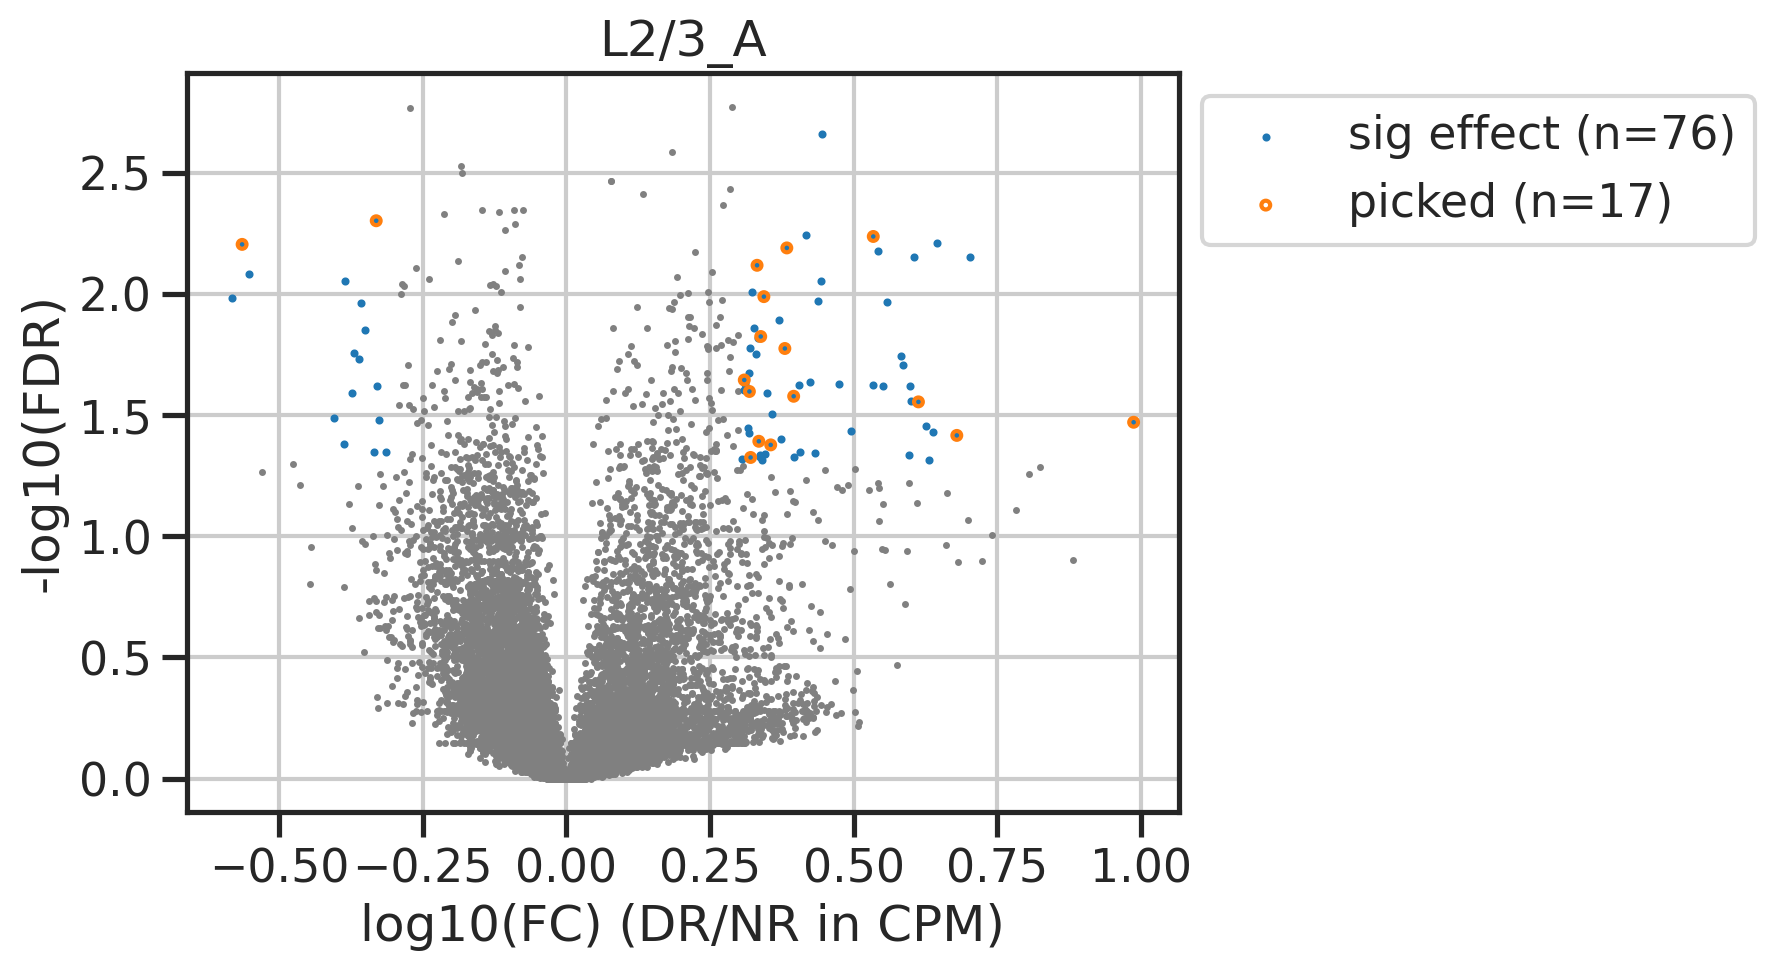

In [27]:
thetype = 'L2/3_A'
thetypeidx = basicu.get_index_from_array(unq_types, [thetype])[0]
print(thetype, thetypeidx)
show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2, cond3) 

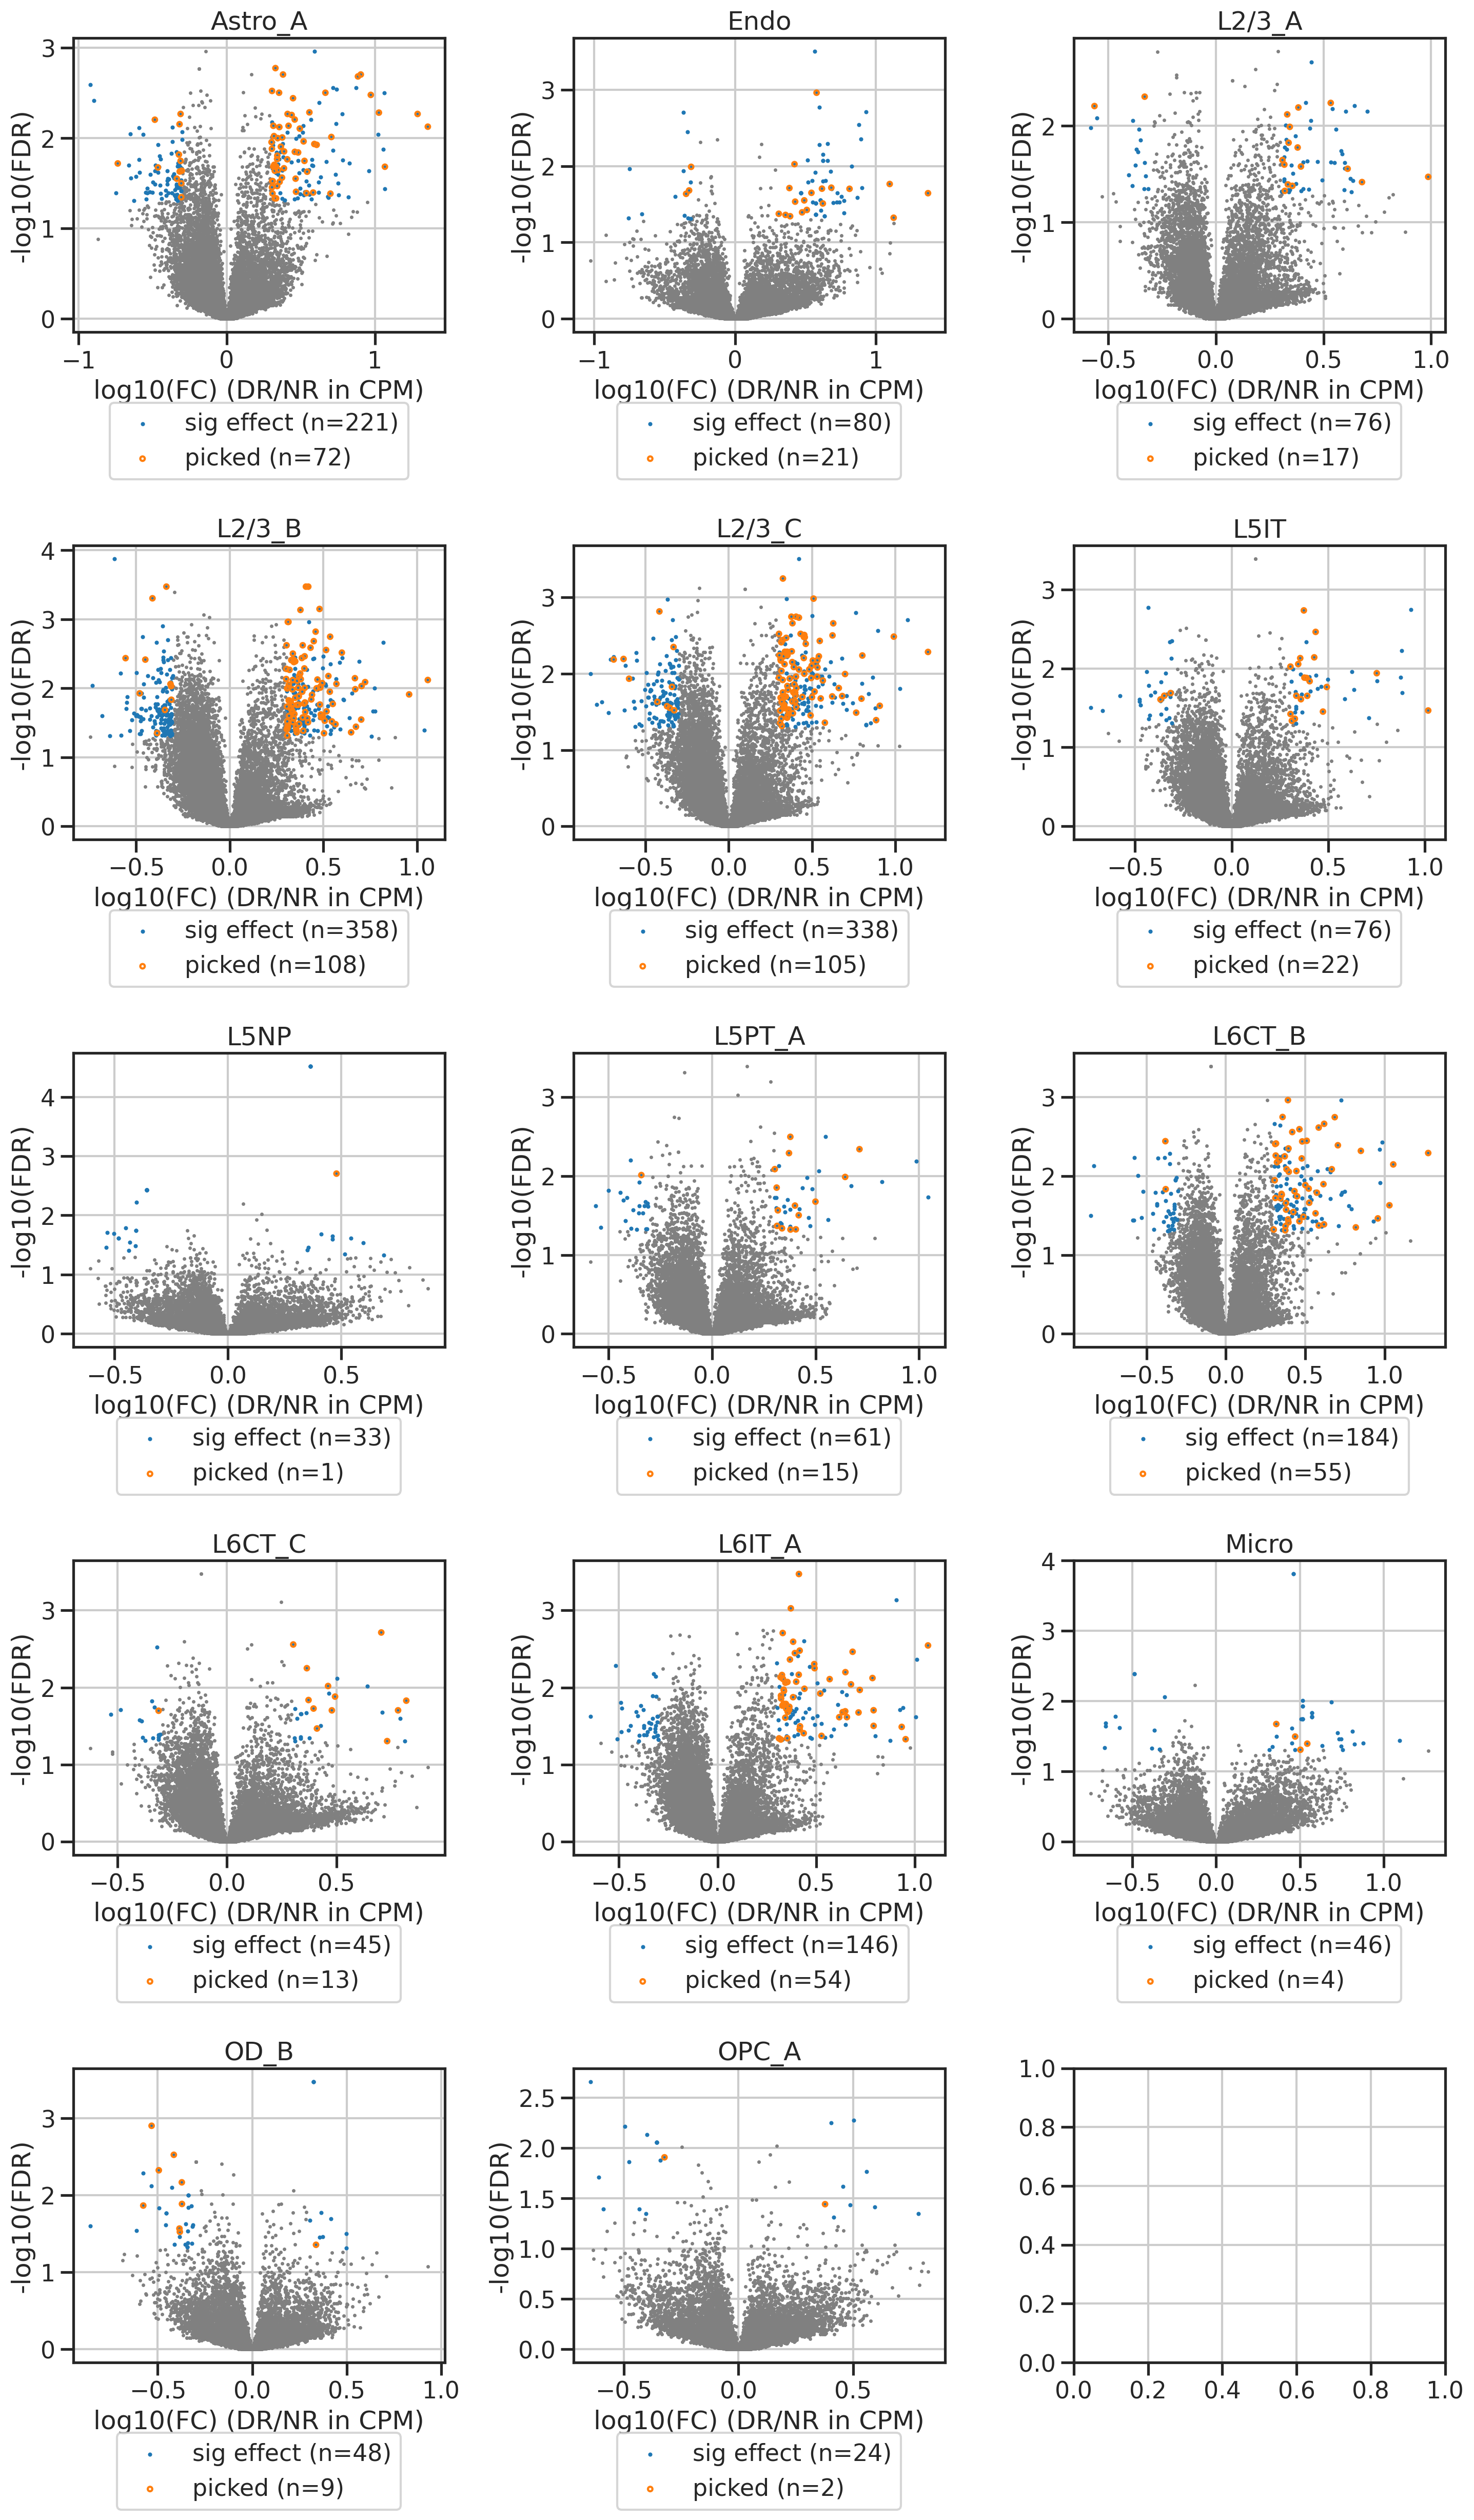

In [28]:
fig, axs = plt.subplots(5,3, figsize=(3*5,5*5))
for thetypeidx, thetype in enumerate(unq_types):
    ax = axs.flat[thetypeidx]
    show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2, cond3, ax=ax, bbox_to_anchor=(0.5, -0.2), loc='upper center') 
fig.tight_layout()
plt.show()

In [29]:
sigsum_genes = sigsum.copy()
ups = []
dns = []
for i, (_type, row) in enumerate(sigsum.iterrows()):
    _up, _dn = extract_res_onetype(i)
    ups.append(", ".join(_up))
    dns.append(", ".join(_dn))
    
sigsum_genes['genes_up'] = ups 
sigsum_genes['genes_dn'] = dns 
sigsum_genes

DR_up  DR_dn                                           genes_up  \
Astro_A     60     12  Coq10b, Map3k19, Nmnat2, Mia3, Bpnt1, Eprs, Ma...   
Endo        18      3  Cntnap5a, Btg2, Brinp3, Atf3, Celf2, Kcnh7, Ds...   
L2/3_A      15      2  Btg2, Nr4a2, Mest, Slc25a3, Arf4, Arhgef3, Egr...   
L2/3_B      98     10  Prim2, Zdbf2, Nmnat2, Mia3, Eprs, Arl5b, Slc25...   
L2/3_C      95     10  Coq10b, Zdbf2, Btg2, Ivns1abp, Nmnat2, Mia3, E...   
L5IT        19      3  Zdbf2, Slc25a25, Mir670hg, Med14, Egfem1, Cyr6...   
L5NP         1      0                                      1700016P03Rik   
L5PT_A      14      1  Eprs, Tiparp, Nr4a3, Rheb, Rnf217, Arhgef3, Si...   
L6CT_B      53      2  Coq10b, Zdbf2, Cntnap5b, Btg2, Nmnat2, Eprs, A...   
L6CT_C      12      1  Zdbf2, Nmnat2, Nr4a2, Cyr61, Nr4a3, Rheb, Egr3...   
L6IT_A      54      0  Zdbf2, Btg2, Nmnat2, Arl5b, Slc25a25, Nr4a2, B...   
Micro        4      0                          Grm3, Gpc5, Cntn5, Kctd16   
OD_B         1      8                                             Nckap5   
OPC_A        1      1                                             Pde10a   

                                                  genes_dn  
Astro_A  Ptprj, Gm3764, Mxd4, Eogt, Hif3a, Galnt18, Tmc...  
Endo                         4930578C19Rik, Clec2d, Zfp366  
L2/3_A                                       Col19a1, Fat3  
L2/3_B   Col19a1, Fhl2, Igfn1, Plxdc2, Etl4, Pde4b, Nel...  
L2/3_C   Col19a1, Pid1, Pld5, Plxdc2, Etl4, Slc24a3, El...  
L5IT                                   Kcnc2, Inf2, Ptchd4  
L5NP                                                        
L5PT_A                                               Dnah9  
L6CT_B                                         Nebl, Fstl4  
L6CT_C                                               Slit3  
L6IT_A                                                      
Micro                                                       
OD_B     Ptgds, Pcdh11x, Gm19439, Zfand4, Sgk1, AC11009...  
OPC_A                                                Vegfa

In [30]:
# types_order = [
#     'L2/3', 
#     'L4', 
#     'L5IT', 
#     'L6IT', 
#     'L5PT', 
#     'L5NP', 
#     'L6CT', 
#     # 'L6b',
    
#     'Pvalb', 
#     'Sst', 
#     'Vip',
#     # 'Lamp5', 
    
#     # 'Stac', 
#     # 'Frem1', 
    
#     'Astro', 
#     'OD', 
#     'OPC',
#     'Micro', 
#     'Endo', 
#     # 'VLMC', 
# ]


In [31]:
dfres = sigsum_genes #.loc[types_order].copy()
dfres
# dfres.to_csv('../results/P28_NR_DR_DEGs_Oct27.csv', header=True, index=True)

DR_up  DR_dn                                           genes_up  \
Astro_A     60     12  Coq10b, Map3k19, Nmnat2, Mia3, Bpnt1, Eprs, Ma...   
Endo        18      3  Cntnap5a, Btg2, Brinp3, Atf3, Celf2, Kcnh7, Ds...   
L2/3_A      15      2  Btg2, Nr4a2, Mest, Slc25a3, Arf4, Arhgef3, Egr...   
L2/3_B      98     10  Prim2, Zdbf2, Nmnat2, Mia3, Eprs, Arl5b, Slc25...   
L2/3_C      95     10  Coq10b, Zdbf2, Btg2, Ivns1abp, Nmnat2, Mia3, E...   
L5IT        19      3  Zdbf2, Slc25a25, Mir670hg, Med14, Egfem1, Cyr6...   
L5NP         1      0                                      1700016P03Rik   
L5PT_A      14      1  Eprs, Tiparp, Nr4a3, Rheb, Rnf217, Arhgef3, Si...   
L6CT_B      53      2  Coq10b, Zdbf2, Cntnap5b, Btg2, Nmnat2, Eprs, A...   
L6CT_C      12      1  Zdbf2, Nmnat2, Nr4a2, Cyr61, Nr4a3, Rheb, Egr3...   
L6IT_A      54      0  Zdbf2, Btg2, Nmnat2, Arl5b, Slc25a25, Nr4a2, B...   
Micro        4      0                          Grm3, Gpc5, Cntn5, Kctd16   
OD_B         1      8                                             Nckap5   
OPC_A        1      1                                             Pde10a   

                                                  genes_dn  
Astro_A  Ptprj, Gm3764, Mxd4, Eogt, Hif3a, Galnt18, Tmc...  
Endo                         4930578C19Rik, Clec2d, Zfp366  
L2/3_A                                       Col19a1, Fat3  
L2/3_B   Col19a1, Fhl2, Igfn1, Plxdc2, Etl4, Pde4b, Nel...  
L2/3_C   Col19a1, Pid1, Pld5, Plxdc2, Etl4, Slc24a3, El...  
L5IT                                   Kcnc2, Inf2, Ptchd4  
L5NP                                                        
L5PT_A                                               Dnah9  
L6CT_B                                         Nebl, Fstl4  
L6CT_C                                               Slit3  
L6IT_A                                                      
Micro                                                       
OD_B     Ptgds, Pcdh11x, Gm19439, Zfand4, Sgk1, AC11009...  
OPC_A                                                Vegfa

In [32]:
dfplot = sigsum_genes.iloc[:,:2].copy() #.loc[types_order].iloc[:,:2].copy()

Text(0, 0.5, 'Number of DE genes \n (FDR<0.05, FC>2, max CPM>100)')

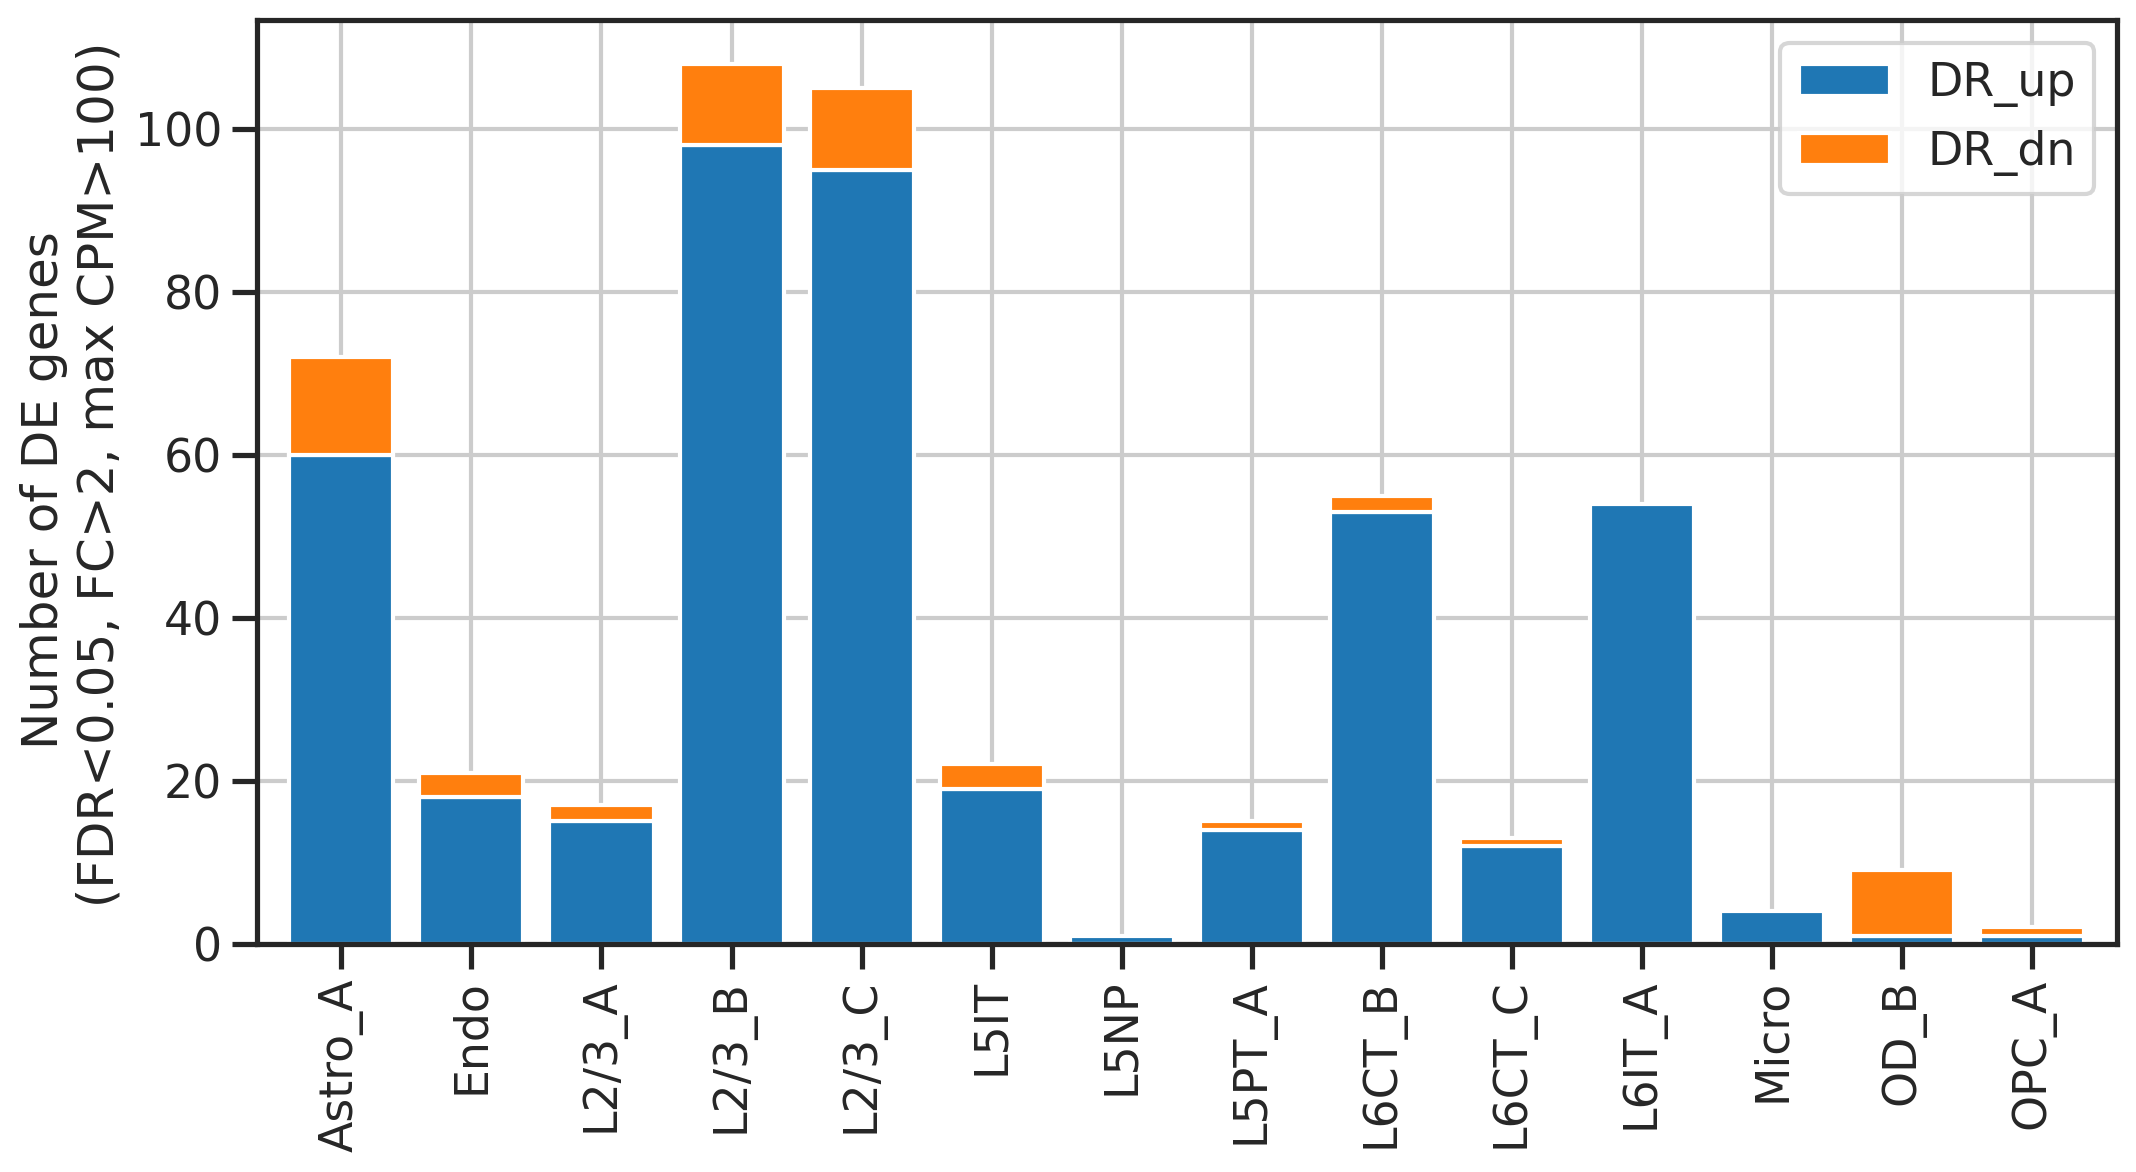

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
dfplot.plot.bar(stacked=True, width=0.8, ax=ax)
ax.set_ylabel('Number of DE genes \n (FDR<0.05, FC>2, max CPM>100)')

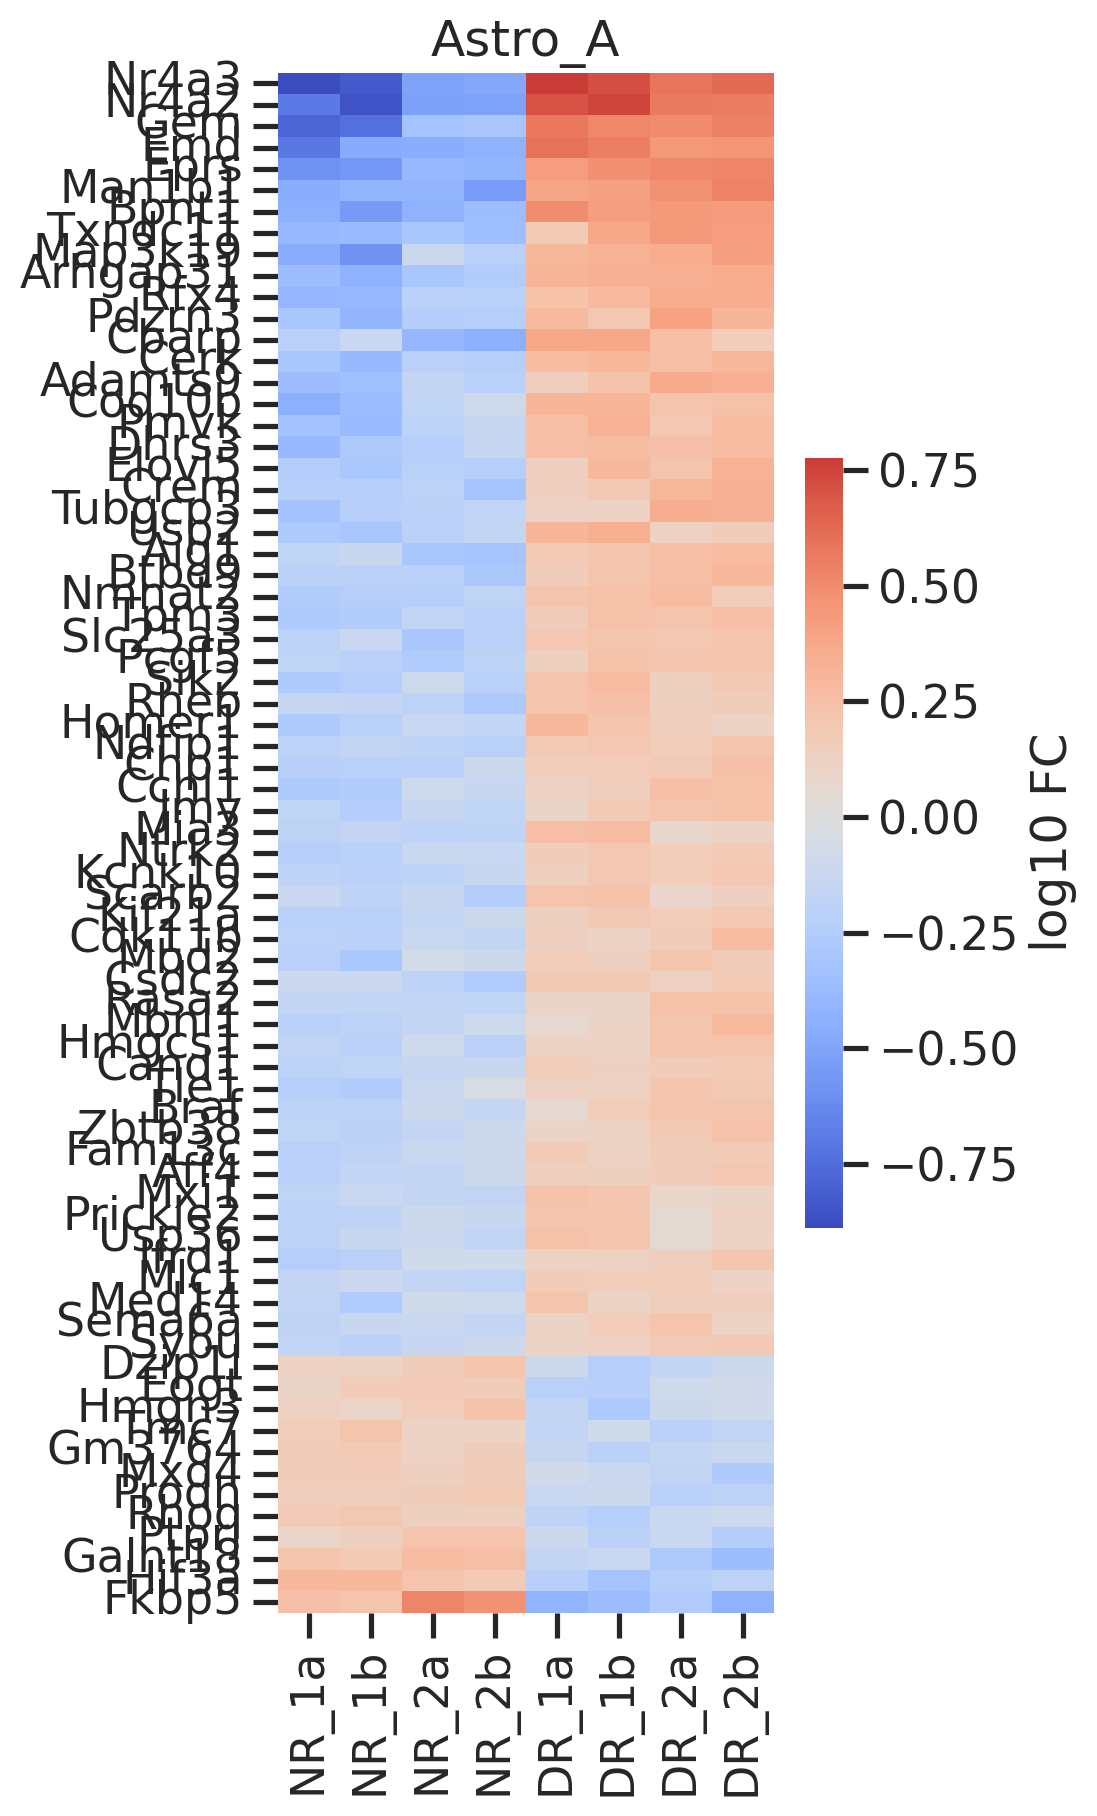

In [34]:
show_onetype(0)

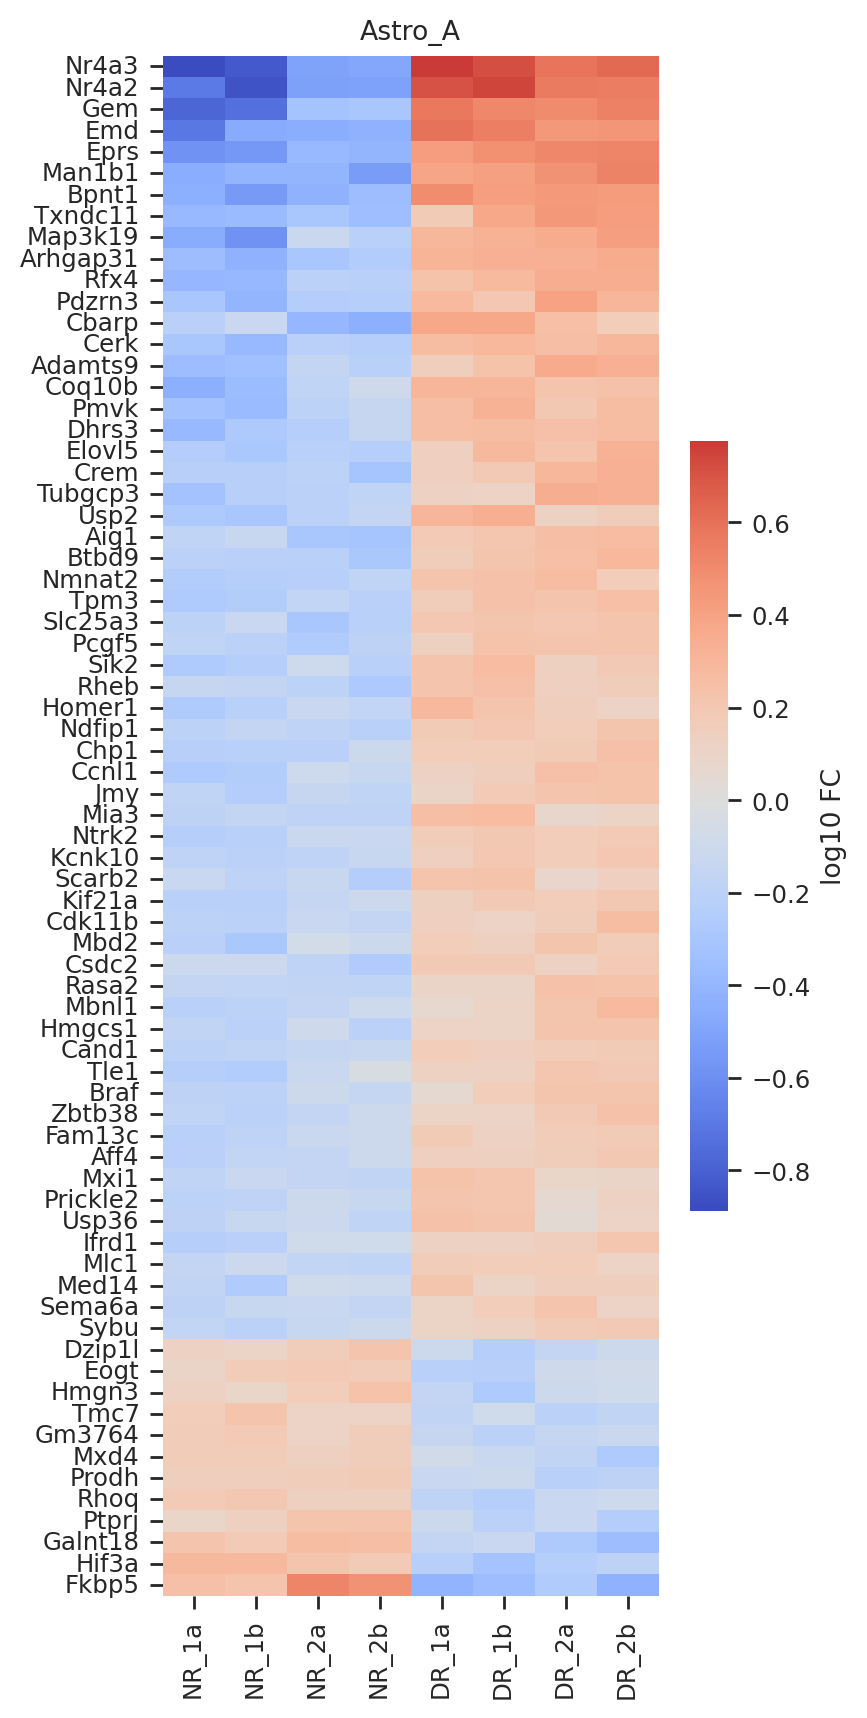

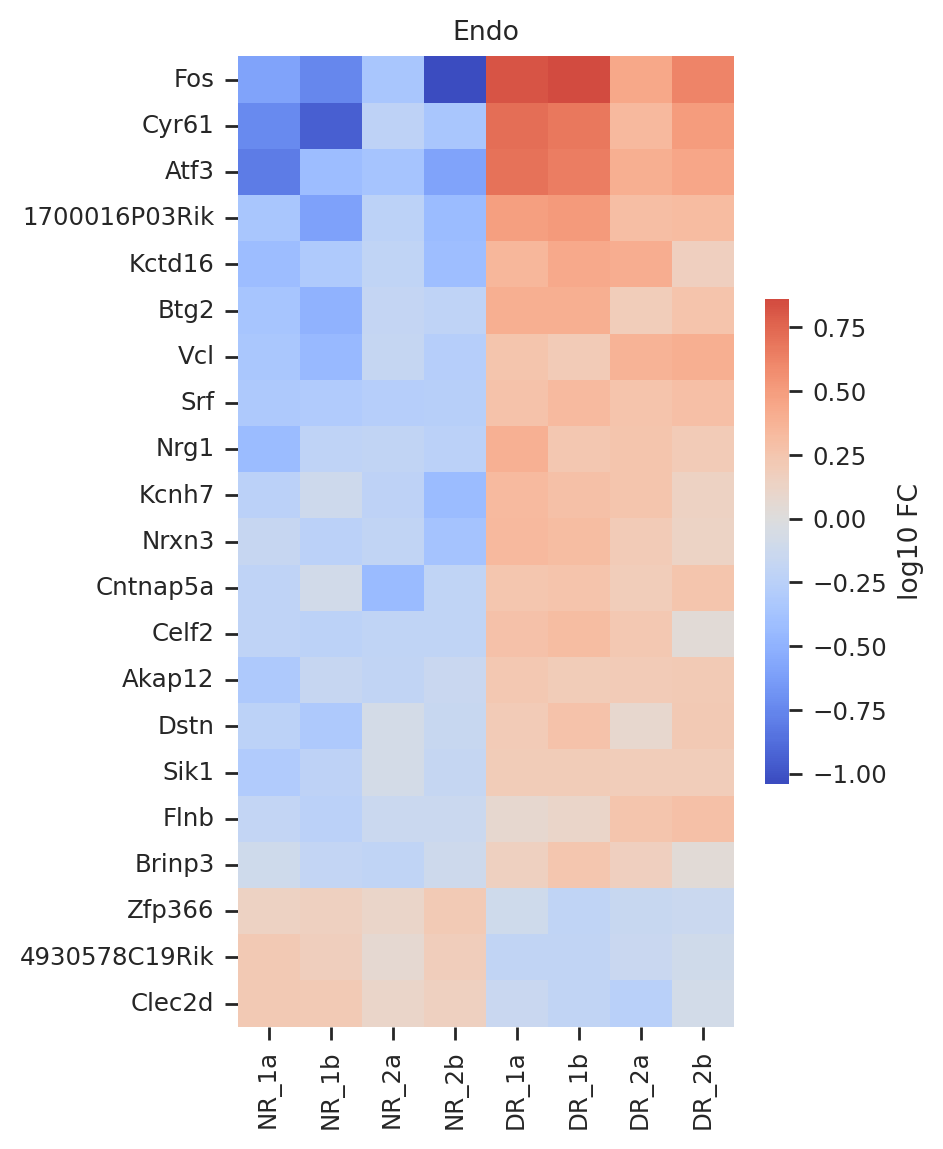

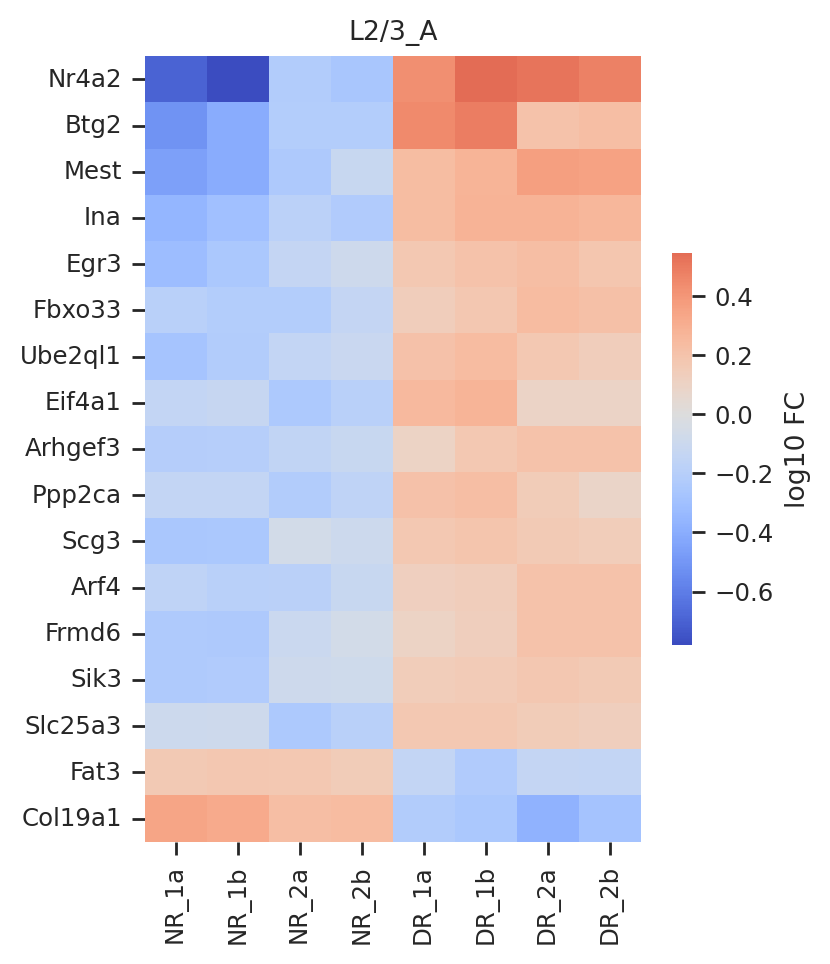

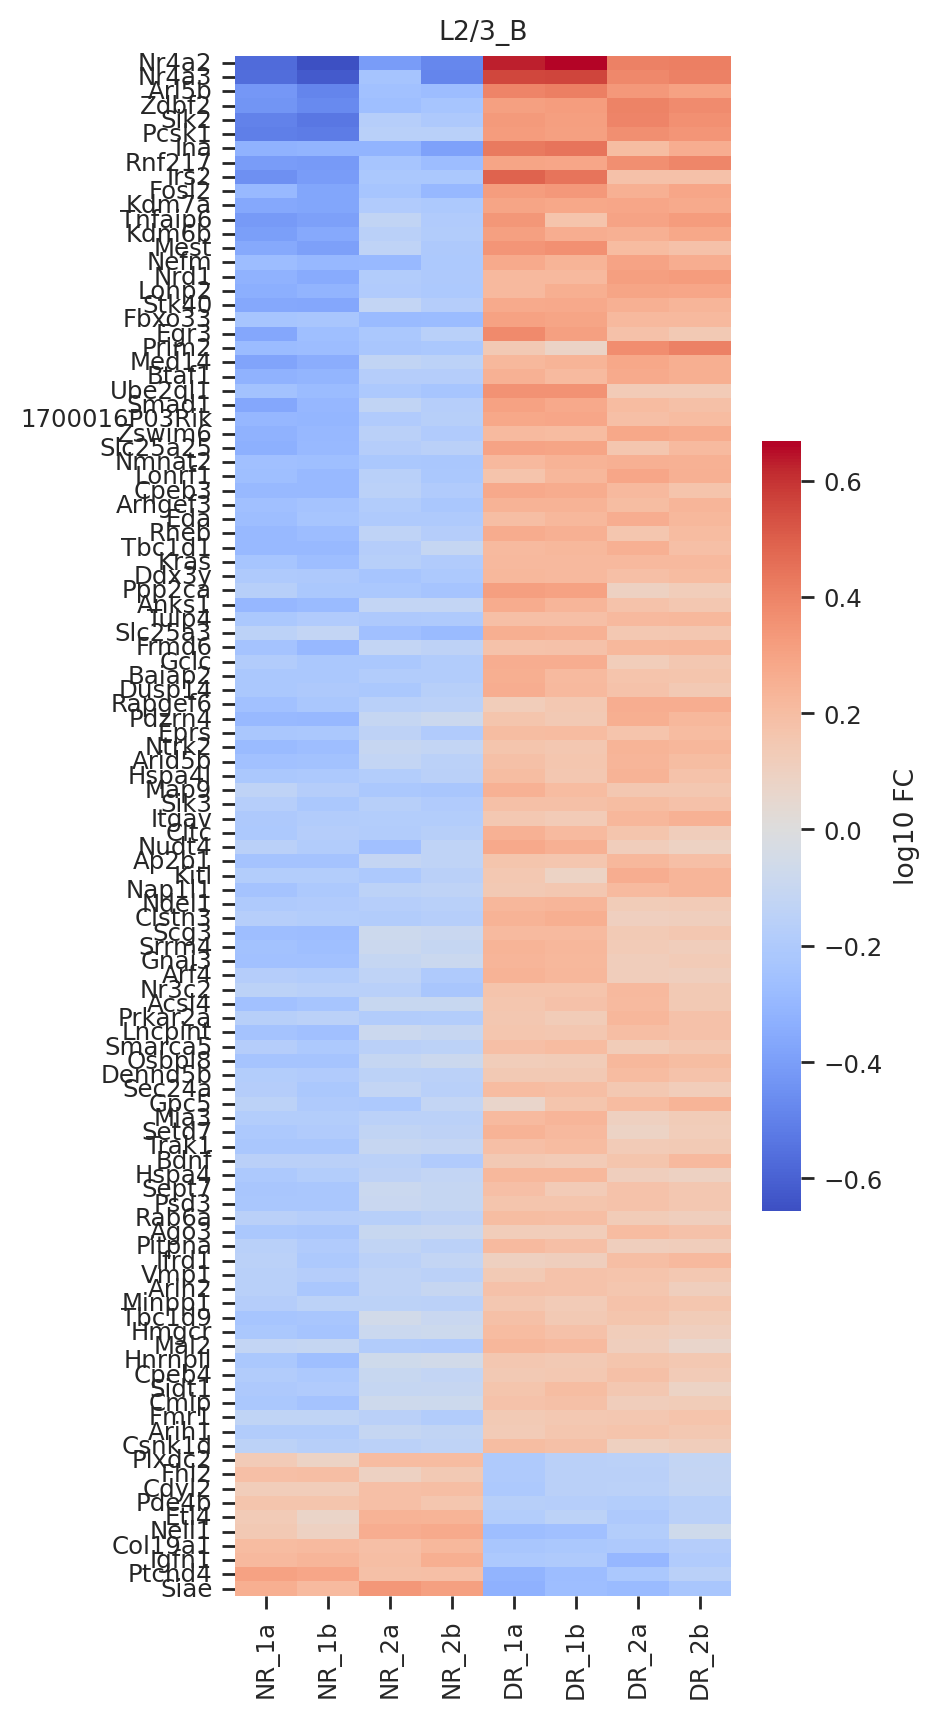

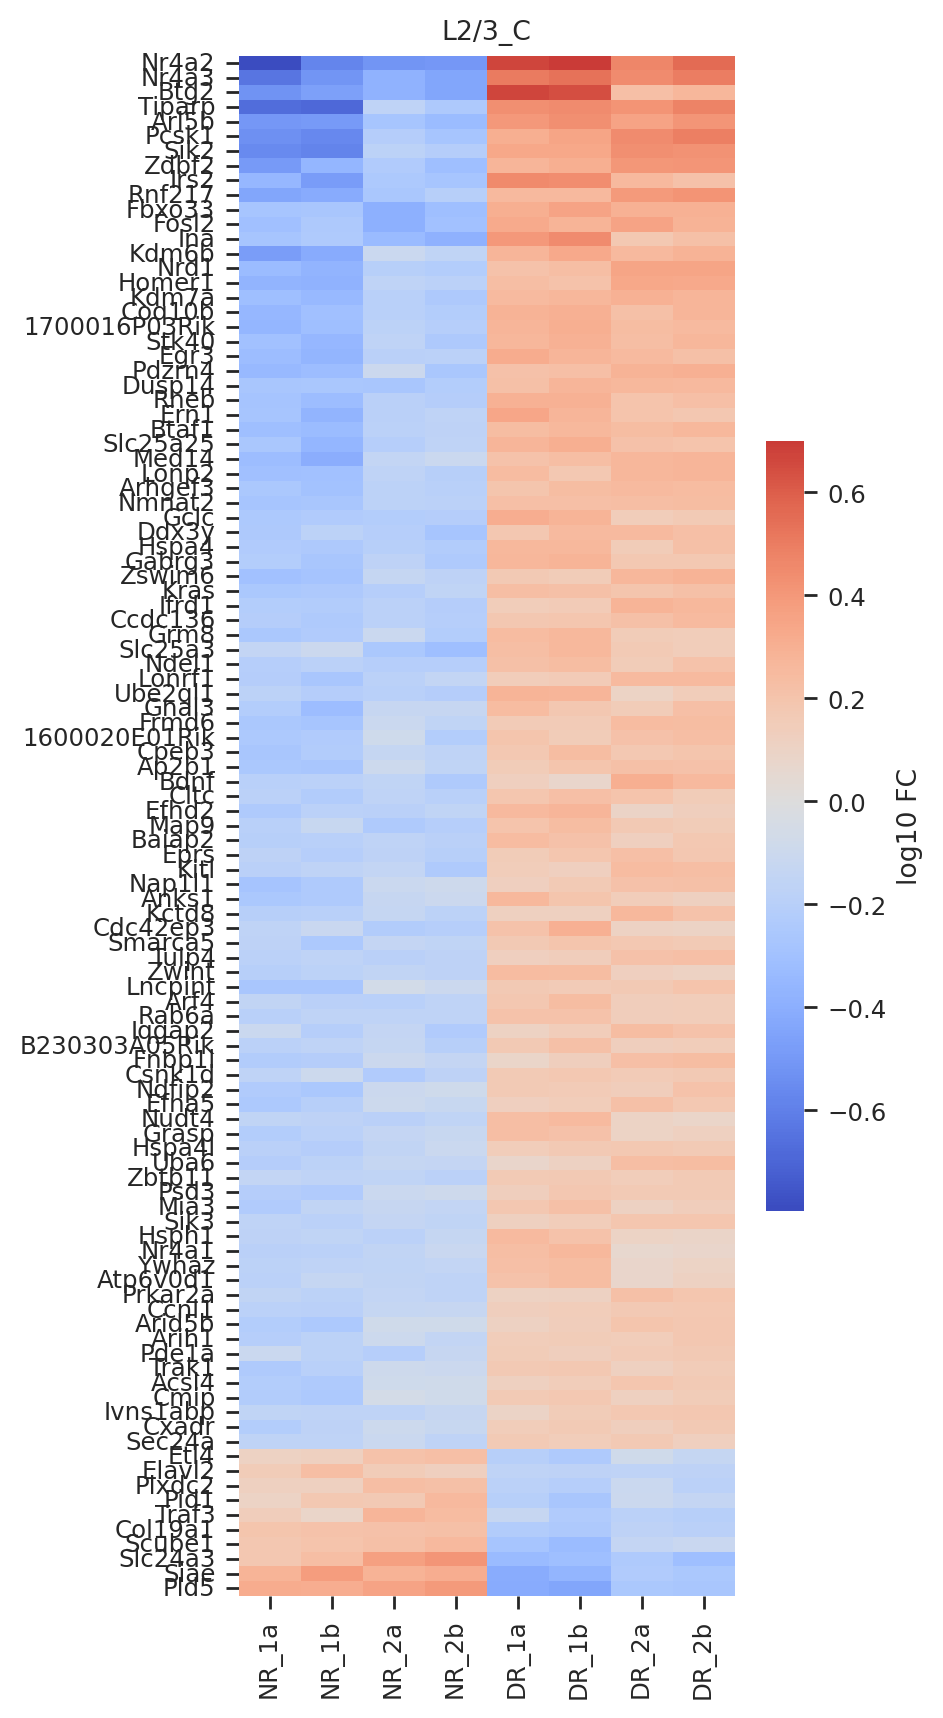

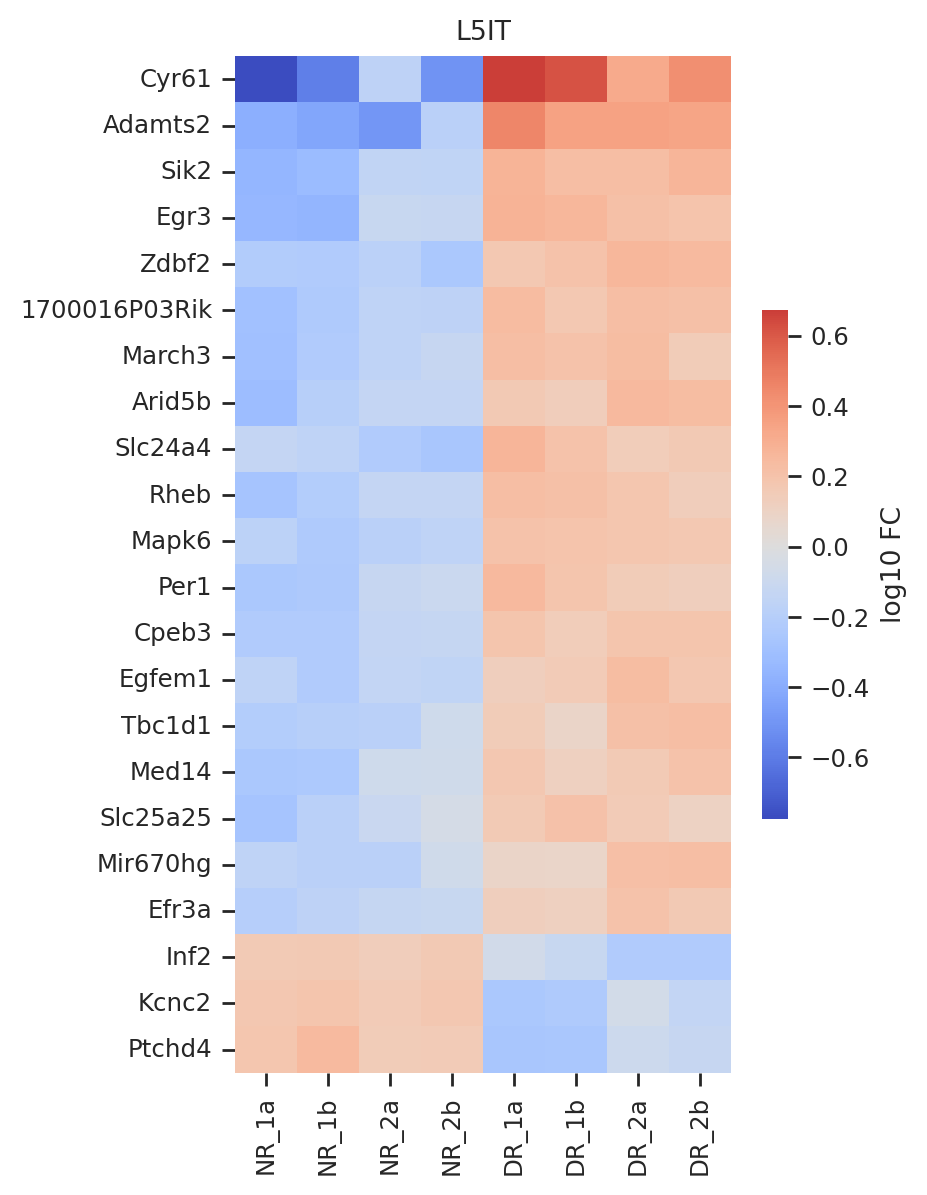

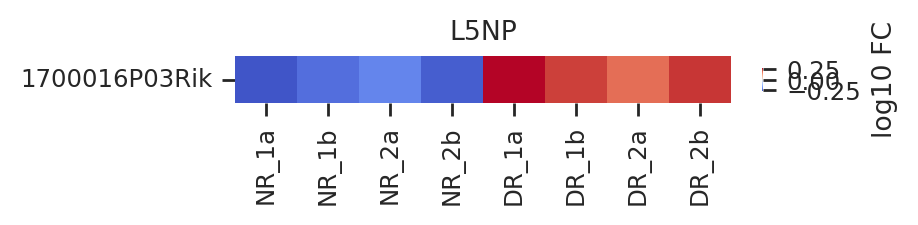

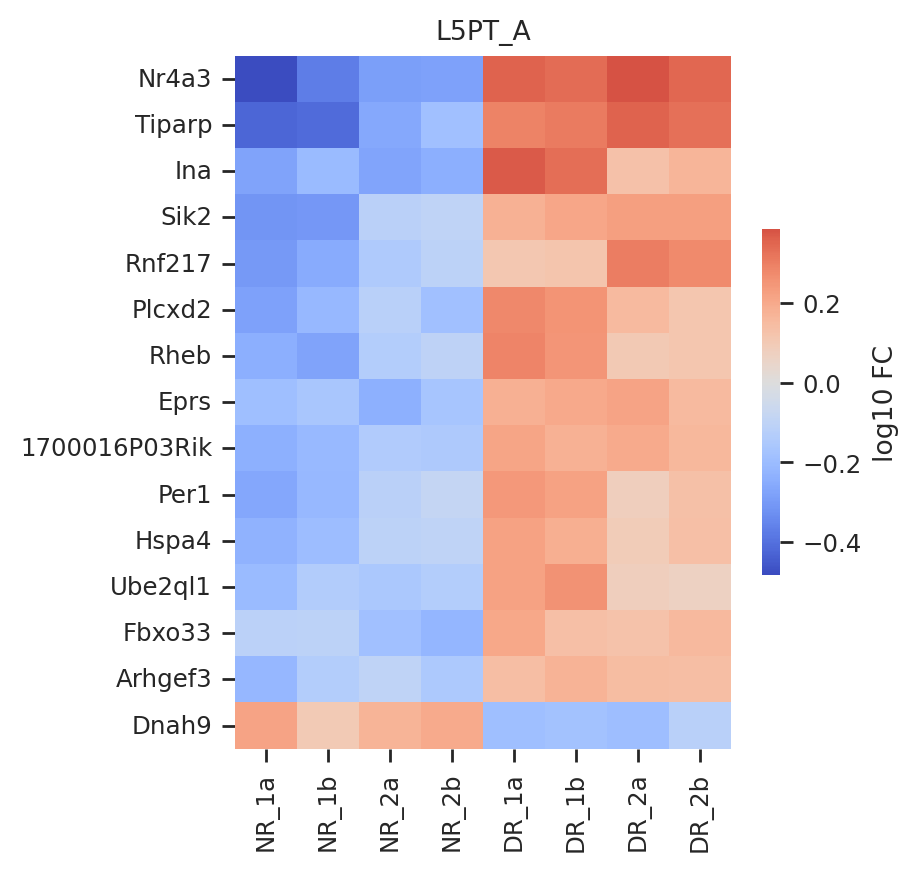

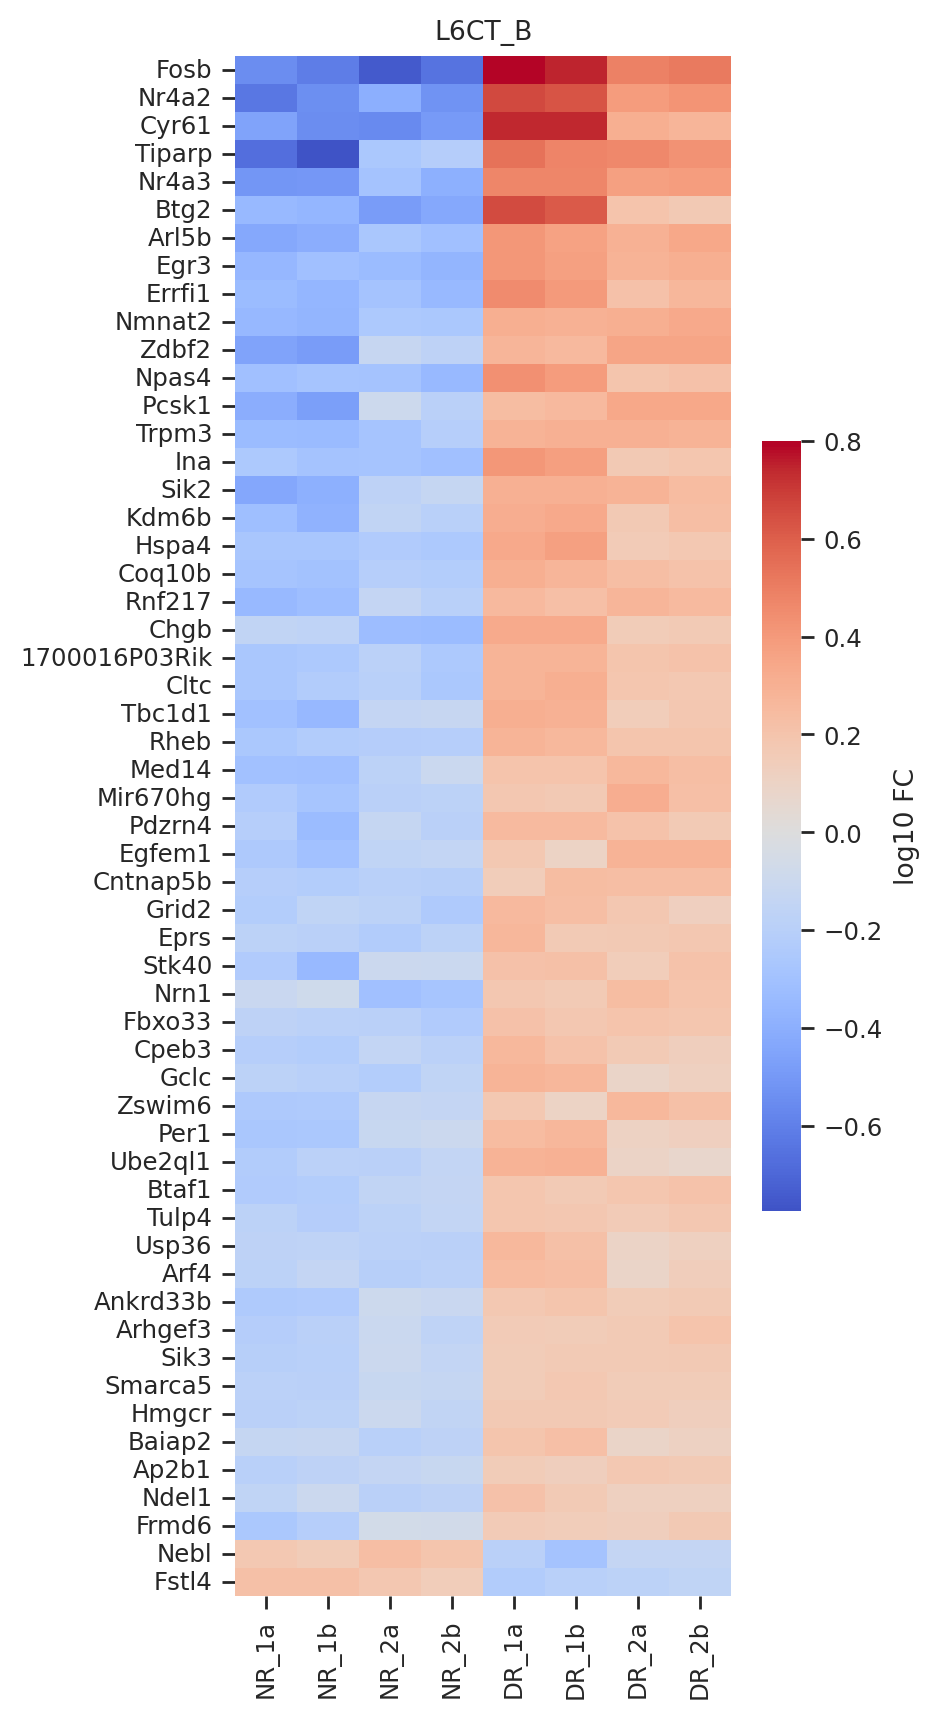

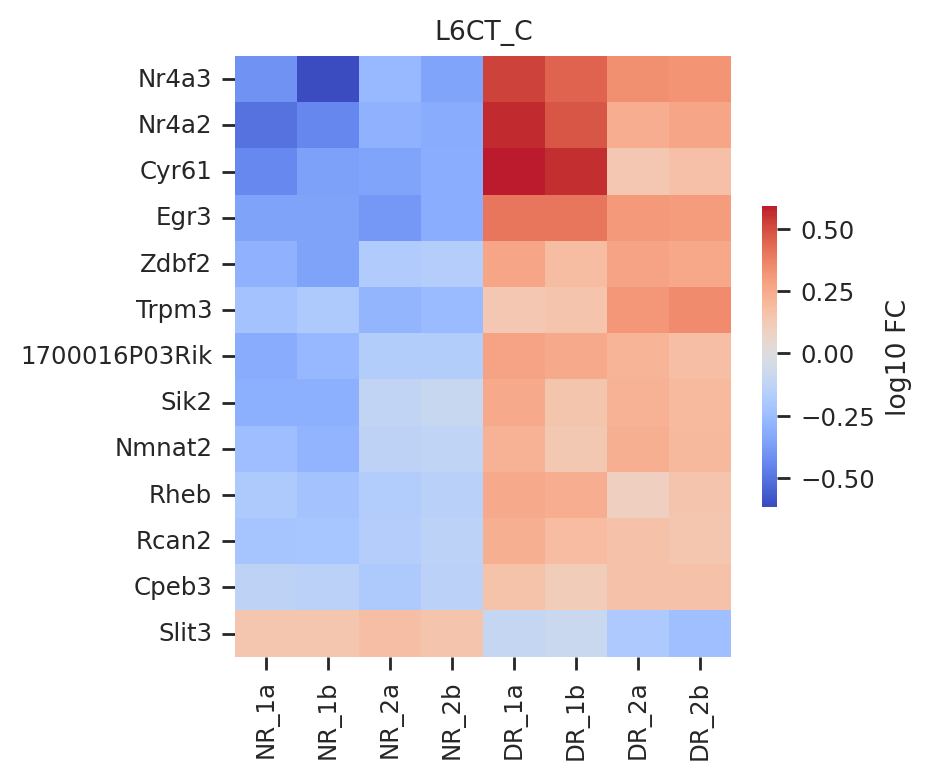

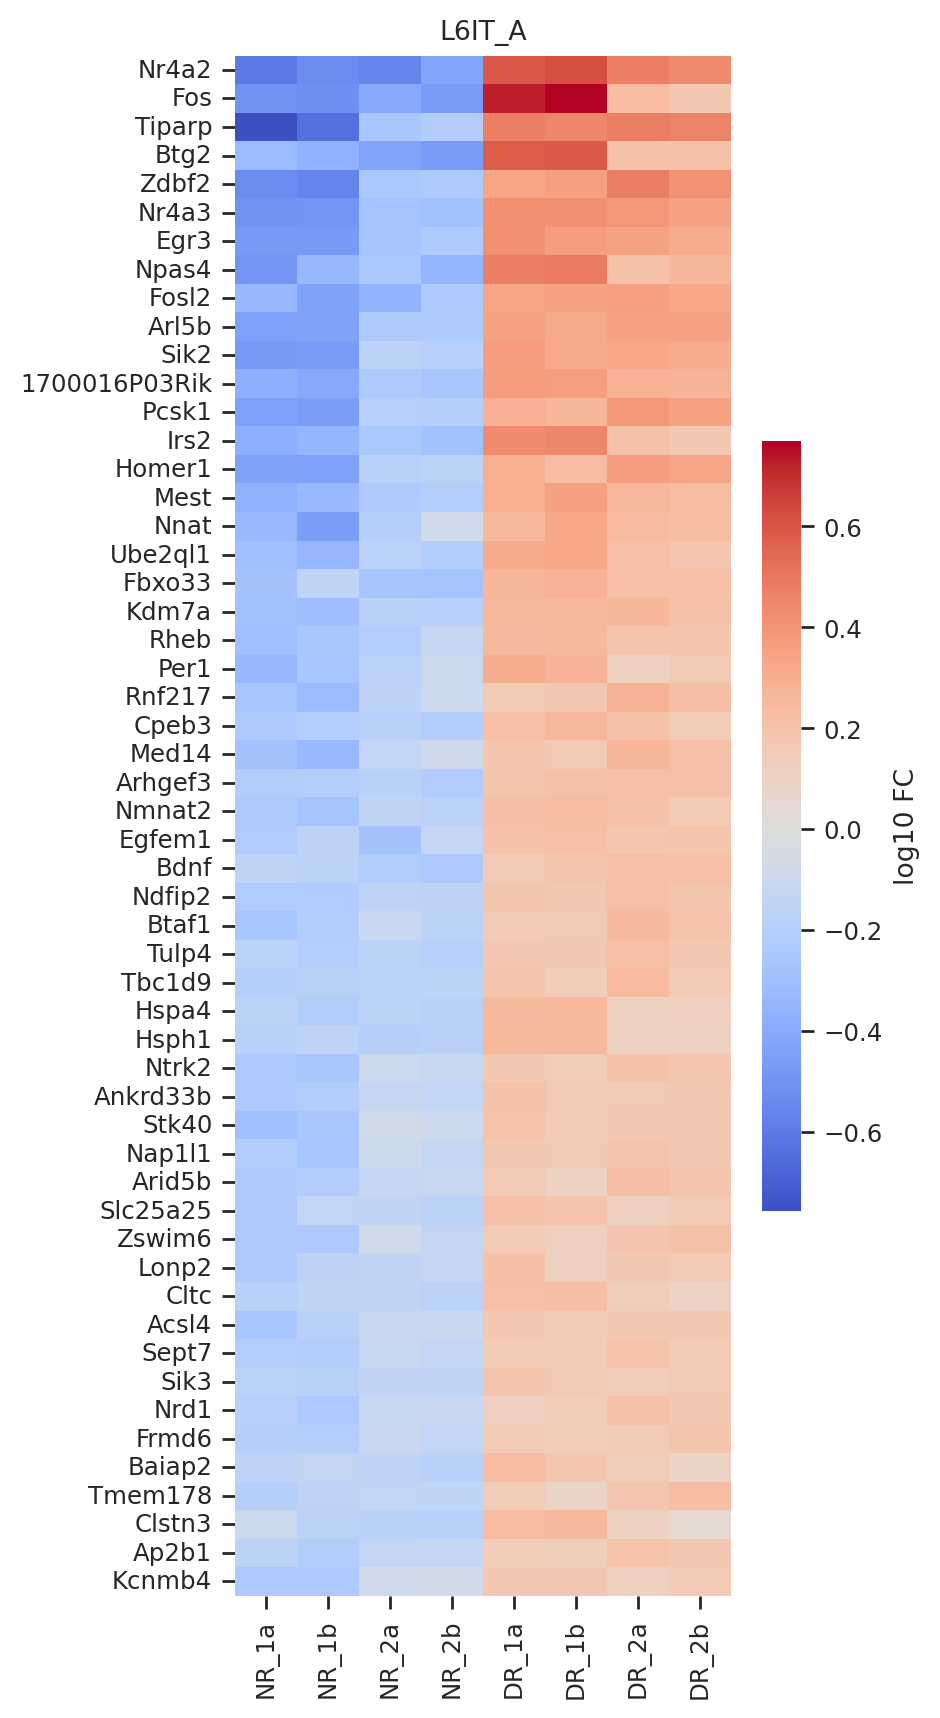

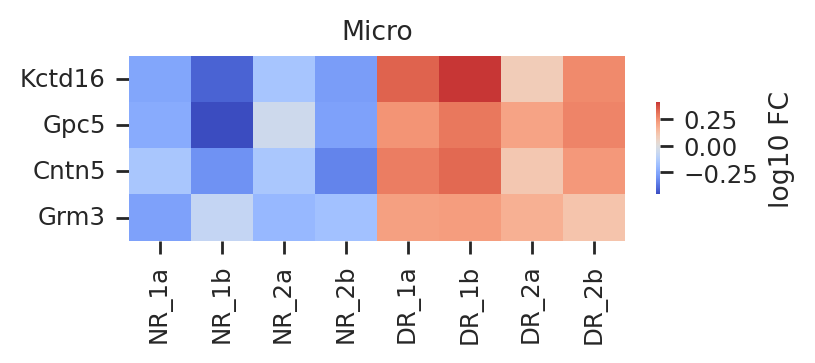

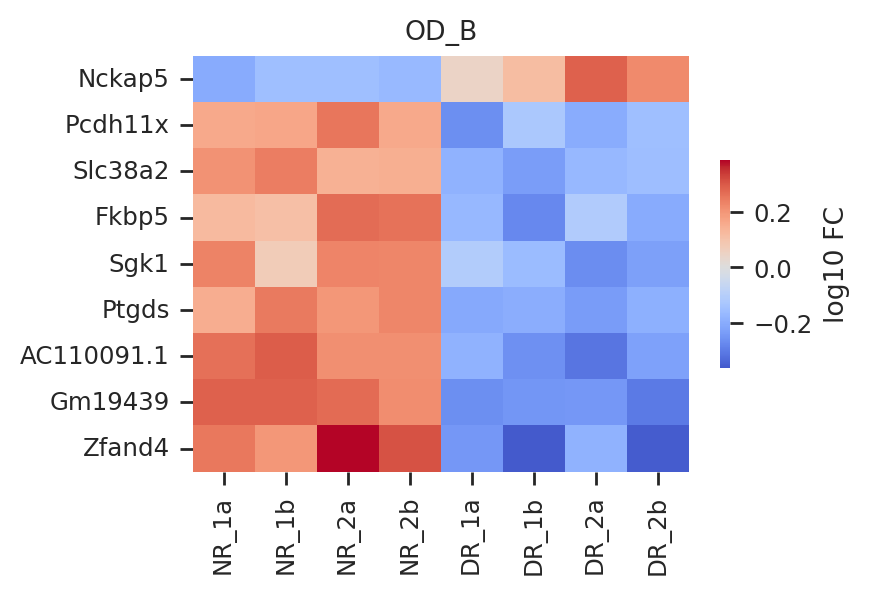

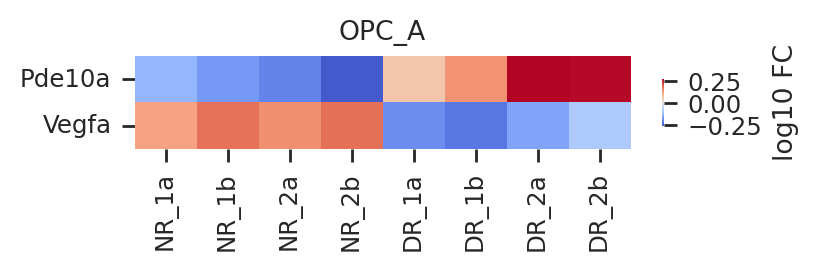

In [35]:
with sns.plotting_context('paper'):
    for i, (_type, row) in enumerate(sigsum.iterrows()):
        if row.sum() > 0:
            show_onetype(i)

# Check a few genes and see

In [36]:
pbulks.shape

(2, 4, 14, 53801)

323 2


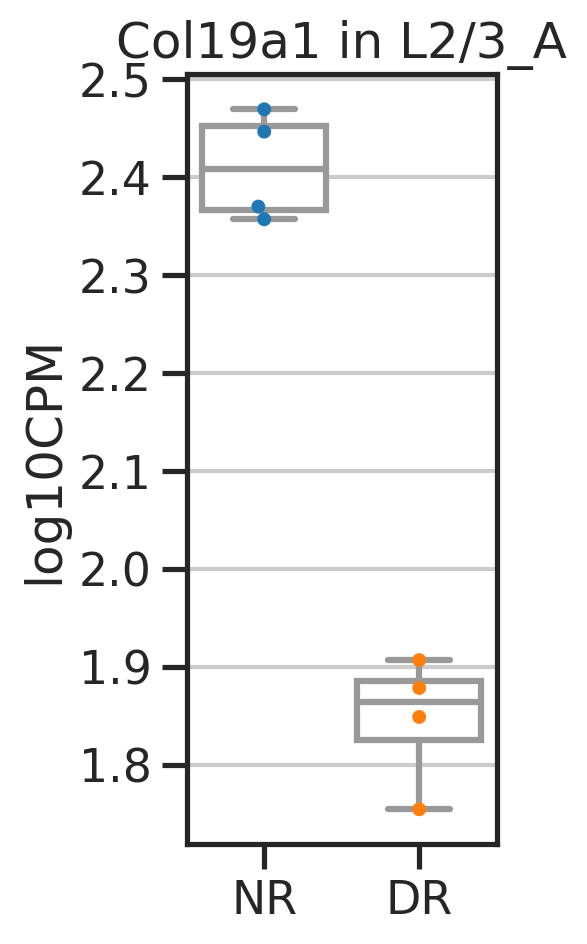

In [37]:
gene_name = 'Col19a1'
type_name = 'L2/3_A'
gidx = basicu.get_index_from_array(genes, [gene_name])[0]
cidx = basicu.get_index_from_array(unq_types, [type_name])[0]
p_nr, p_dr = pbulks[:,:,cidx,gidx]
print(gidx, cidx)

fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot  ([p_nr, p_dr], color='white', ax=ax)
sns.swarmplot([p_nr, p_dr], s=5, ax=ax)
ax.set_xticklabels(['NR', 'DR'])
ax.set_ylabel('log10CPM')
ax.set_title(f'{gene_name} in {type_name}')
plt.show()

4577 2


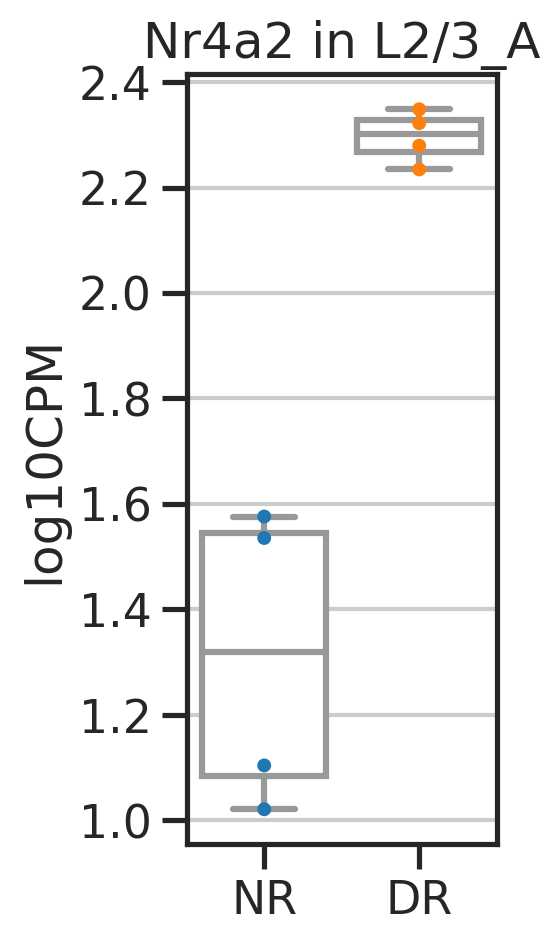

In [38]:
gene_name = 'Nr4a2'
type_name = 'L2/3_A'
gidx = basicu.get_index_from_array(genes, [gene_name])[0]
cidx = basicu.get_index_from_array(unq_types, [type_name])[0]
p_nr, p_dr = pbulks[:,:,cidx,gidx]
print(gidx, cidx)

fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot  ([p_nr, p_dr], color='white', ax=ax)
sns.swarmplot([p_nr, p_dr], s=5, ax=ax)
ax.set_xticklabels(['NR', 'DR'])
ax.set_ylabel('log10CPM')
ax.set_title(f'{gene_name} in {type_name}')
plt.show()

13417 2


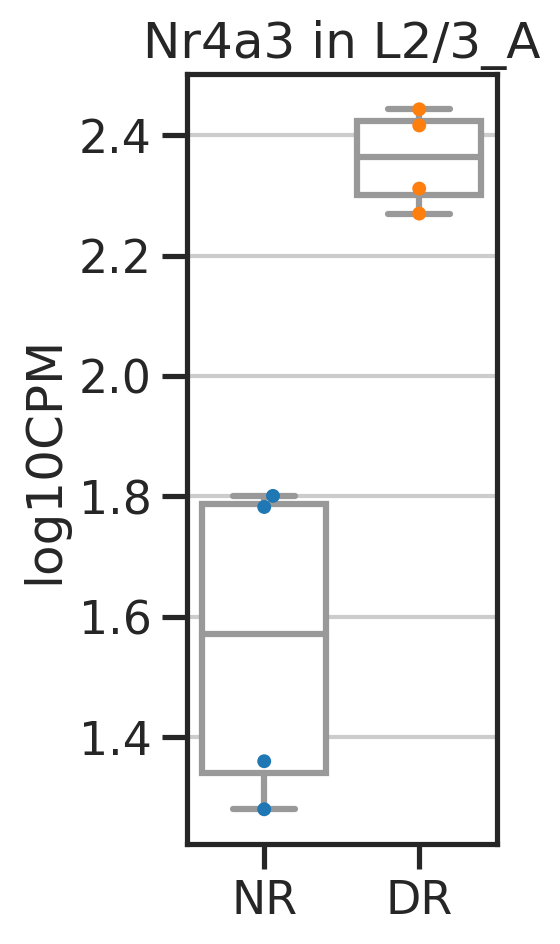

In [39]:
gene_name = 'Nr4a3'
type_name = 'L2/3_A'
gidx = basicu.get_index_from_array(genes, [gene_name])[0]
cidx = basicu.get_index_from_array(unq_types, [type_name])[0]
p_nr, p_dr = pbulks[:,:,cidx,gidx]
print(gidx, cidx)

fig, ax = plt.subplots(figsize=(2,5))
sns.boxplot  ([p_nr, p_dr], color='white', ax=ax)
sns.swarmplot([p_nr, p_dr], s=5, ax=ax)
ax.set_xticklabels(['NR', 'DR'])
ax.set_ylabel('log10CPM')
ax.set_title(f'{gene_name} in {type_name}')
plt.show()

# Generate the list of genes

In [40]:
types = np.array(xclsts_sel)
types

array(['Astro_A', 'Endo', 'L2/3_A', 'L2/3_B', 'L2/3_C', 'L5IT', 'L5NP',
       'L5PT_A', 'L6CT_B', 'L6CT_C', 'L6IT_A', 'Micro', 'OD_B', 'OPC_A'],
      dtype='<U7')

In [41]:
sigsigs.shape, sigsigs_up.shape, sigsigs_dn.shape, types.shape, genes_comm.shape

((19788, 14), (19788, 14), (19788, 14), (14,), (19788,))

In [42]:
sigsigs.nonzero()[0].shape, sigsigs_up.nonzero()[0].shape, sigsigs_dn.nonzero()[0].shape

((498,), (445,), (53,))

In [43]:
res = pd.DataFrame()
gi_up, ti_up = sigsigs_up.nonzero()
gi_dn, ti_dn = sigsigs_dn.nonzero()
res['gene'] = genes_comm[np.hstack([gi_up, gi_dn])]
res['subclass'] =  types[np.hstack([ti_up, ti_dn])]
res['reason'] = ['DRup']*len(gi_up) + ['DRdn']*len(gi_dn)
res

gene subclass reason
0     Prim2   L2/3_B   DRup
1    Coq10b  Astro_A   DRup
2    Coq10b   L2/3_C   DRup
3    Coq10b   L6CT_B   DRup
4     Zdbf2   L2/3_B   DRup
..      ...      ...    ...
493   Fkbp5     OD_B   DRdn
494  Ptchd4   L2/3_B   DRdn
495  Ptchd4     L5IT   DRdn
496   Vegfa    OPC_A   DRdn
497    Rhoq  Astro_A   DRdn

[498 rows x 3 columns]

In [44]:
res['gene'].unique().shape

(262,)